# Project 2

It is October 2018. The squirrels in Central Park are running into a problem and we need your help.

For this project you must go through most steps in the checklist. You must write responses for all items however sometimes the item will simply be "does not apply". Some of the parts are a bit more nebulous and you simply show that you have done things in general (and the order doesn't really matter). Keep your progress and thoughts organized in this document and use formatting as appropriate (using markdown to add headers and sub-headers for each major part). Do not do the final part (launching the product) and your presentation will be done as information written in this document in a dedicated section, no slides or anything like that. It should however include the best summary plots/graphics/data points.

You are intentionally given very little information thus far. You must communicate with your client (me) for additional information as necessary. But also make sure that your communications are efficient, thought out, and not redundant as your client might get frustrated and "fire" you (this only applies to getting information from your client, this does not necessary apply to asking for help with the actual project itself - you should continuously ask questions for getting help).

You must submit all data files and a pickled preprocessor and final model along with this notebook.

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn import set_config
set_config(transform_output = "pandas")

## Frame the Problem and Look at the Big Picture

1. Define the objective in business terms
<mark>The primary business objective is to efficiently manage resources in Central Park to mitigate the spread of a disease among the squirrel population. The goal is to identify and test squirrels that are likely infected by analyzing sighting data and behavioral patterns to preserve the ecological balance without exhausting available resources.</mark>

2. How will your solution be used?
<mark>The machine learning solution will be used to predict the likelihood of a squirrel being infected based on sightings and behavior patterns. This predictive model will help park authorities decide when to deploy testing resources to specific sightings, ensuring that interventions are timely and effective, minimizing unnecessary testing and focusing efforts on high-risk cases.</mark>

3. How should you frame this problem?
<mark>This problem should be framed as a binary classification issue where the outcome to predict is whether a squirrel needs to be tested based on the likelihood of infection. Input features might include location data, time of sighting, behaviors exhibited, and any other environmental or direct observations noted during the sighting.</mark>

4. How should performance be measured? Is the performance measure aligned with the business objective?
<mark>Performance should be measured using metrics such as accuracy, precision, recall, and the area under the ROC curve (AUC-ROC). Precision is particularly important as it reflects the proportion of true positives among all positive predictions, aligning with the business objective of maximizing resource efficiency and minimizing unnecessary tests.</mark>

5. What would be the minimum performance needed to reach the business objective?
<mark>The minimum performance would likely require a high precision to ensure that only squirrels highly likely to be infected are tested. A precision threshold of at least 80% might be considered essential to avoid wasting limited testing resources and personnel time.</mark>

6. What are comparable problems? Can you reuse (personal or readily available) experience or tools?
<mark>Comparable problems include medical diagnostic tests, wildlife monitoring for disease control, and other predictive maintenance tasks. Tools and experiences from these areas, such as decision trees, logistic regression, or more complex machine learning models like Random Forests or SVMs, could be adapted for use in this project.</mark>

7. Is human expertise available?
<mark>Yes, park rangers, wildlife experts, and veterinarians would be available to provide insights into squirrel behaviors, symptoms of the disease, and other ecological factors that might influence the spread of the disease.</mark>

8. How would you solve the problem manually?
<mark>Manually, the problem would be solved by having experts review each sighting report, assessing the likelihood of infection based on the squirrel's behavior, physical symptoms observed, and the context of the sighting (e.g., location, time, other environmental factors).</mark>

9. List the assumptions you (or others) have made so far. Verify assumptions if possible.
<mark>Assumptions include:</mark>
- <mark>The data collected accurately represents the overall squirrel population and their health status.</mark>
- <mark>Behavioral patterns can reliably indicate health status.</mark>
- <mark>The disease has visible or otherwise detectable symptoms that can be observed in a park setting.</mark>
- <mark>Testing resources and personnel are limited and must be efficiently allocated.</mark>



Get the Data
============
1. List the data you need and how much you need
- <mark>Squirrel Sightings Data<mark>

- <mark>Squirrel Health Status Data<mark>

- <mark>Behavioral Observations Data<mark>

- <mark>Environmental and Weather Data<mark>

- <mark> Weather Data in New york October 2018<mark>





2.  Find and document where you can get that data

-  diseased_squirrels.csv - provides unique identfier for the squirrels, time of day and date 


- 2018 Central Park Squirrel Census - Squirrel Data

    https://data.cityofnewyork.us/Environment/2018-Central-Park-Squirrel-Census-Squirrel-Data/vfnx-vebw/data_preview


- 2018 Squirrel Census Fur Color Map
    https://data.cityofnewyork.us/Environment/2018-Squirrel-Census-Fur-Color-Map/fak5-wcft


- 2018 Central Park Squirrel Census - Stories (maybe)
    https://data.cityofnewyork.us/Environment/2018-Central-Park-Squirrel-Census-Stories/gfqj-f768/about_data

- Weather Data in New york October 2018
    https://www.visualcrossing.com/weather/weather-data-services#
    https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/retrievebulkdataset?&key=F98DKRY9MM5J97FTQ6VRGJP4X&taskId=2e34e1e85877a193c59b0cfb7be60a3e&zip=false




3. Get access authorizations


4. Create a workspace: 
- This notebook 

5.  **Get the data**: 
   

6. **Convert the data to a format you can easily manipulate**:
   - Provided in CSV files so easy to use.

7. **Ensure sensitive information is deleted or protected**:
- Public data already has been anonymized.

8. **Check the size and type of data (time series, geographical, …)**

    1. 
        <mark>•	Stories Data: 809 entries with 12 columns, mostly text fields with topics related to squirrel and park stories. It’s not a time series; it has categorical and textual data.
	    •	Diseased Squirrels Data: 321 entries with a single column of string IDs, likely for mapping squirrel disease occurrences.
	    •	Squirrel Census Data: 3023 entries with 31 columns, including geolocation data (X, Y coordinates) and various observational fields (e.g., fur color, behaviors). The Date column could make it useful as a time series, though it appears to be event-based.<mark>
    
    2. Is it a time series?
       <mark> •	Squirrel Census Data is the only set that could potentially be analyzed as a time series using the Date field. The other datasets do not contain any inherent temporal ordering.<mark>
    
    3. Are any of the features unusable for the business problem?
        <mark>•	Stories Data: Several columns have high missing values, e.g., “Story Topic: Accidental Poems” and “Story Topic: Squirrels Acting Odd.” These may be excluded if they don’t serve the analysis.
	    •	Diseased Squirrels Data: Single-column format, usable only if it serves a direct purpose in identifying health statuses.
	    •	Squirrel Census Data: Columns like “Other Activities” and “Other Interactions” contain mostly missing data and may be omitted unless critical for the business problem.<mark>

    4. Which feature(s) will be used as the target/label for the business problem? (including which are required to derive the correct label)
        <mark>•	Target Feature: This depends on the business question, but for a health-related analysis, fields like “Age” or behaviors (“Running,” “Foraging”) in the Squirrel Census data could be candidates, or mapping ID matches between the Diseased Squirrels and Squirrel Census data to determine health status patterns.<mark>

    5. Should any of the features be stratified during the train/test split to avoid sampling biases?
       	<mark>•	Stratification might be necessary based on “Age” or “Primary Fur Color” in the Squirrel Census data to maintain diversity in demographic features. If focusing on health outcomes, stratifying by a feature related to disease occurrence or geography may reduce sampling bias.<mark>

In [73]:
# Load CSV files into variables
squirrel_data = pd.read_csv('2018_Central_Park_Squirrel_Census_-_Squirrel_Data_20241106.csv')

stories_data = pd.read_csv('2018_Central_Park_Squirrel_Census_-_Stories_20241106.csv')

diseased_squirrels = pd.read_csv('diseased_squirrels.csv', header=None, names=["Unique Squirrel ID"])

weather_data = pd.read_csv('weather.csv')



In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Function to drop unneeded features from the weather dataset
def drop_unaligned_features(data):
    return data.drop(columns=[
        'feelslikemax', 'feelslikemin', 'feelslike', 'precipprob', 
        'sealevelpressure', 'stations', 'cloudcover', 'visibility', 
        'severerisk', 'moonphase', 'uvindex', 'conditions', 
        'description', 'icon','tempmin', 'tempmax'
    ])

def convert_sun_times(data):
    # Convert 'sunrise' and 'sunset' columns to datetime
    data['sunrise'] = pd.to_datetime(data['sunrise'])
    data['sunset'] = pd.to_datetime(data['sunset'])
    return data

def split_data(data):
    # Split the data into training and testing sets
    train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
    return train_data, test_data

# def create_label_feature(data):


# Assuming you've loaded your data somewhere above this snippet
# Example: weather_data = pd.read_csv('weather_data.csv')
# Example: squirrel_data = pd.read_csv('squirrel_data.csv')
# Example: diseased_squirrels = pd.read_csv('diseased_squirrels.csv')
# Example: stories_data = pd.read_csv('stories_data.csv')

# Rename the date column if necessary
if 'Date' not in weather_data.columns:
    weather_data.rename(columns={'datetime': 'Date'}, inplace=True)

# Adding disease status to squirrels
if 'Diseased' not in squirrel_data.columns:
    squirrel_data = squirrel_data.merge(diseased_squirrels.assign(Diseased=1), on="Unique Squirrel ID", how="left")
    squirrel_data['Diseased'] = squirrel_data['Diseased'].fillna(0).astype(int)

# Convert 'Date' columns in all datasets to datetime format for consistency
squirrel_data['Date'] = pd.to_datetime(squirrel_data['Date'], format='%m%d%Y', errors='coerce')
stories_data['Date'] = pd.to_datetime(stories_data['Date'], format='%m%d%Y', errors='coerce')
weather_data['Date'] = pd.to_datetime(weather_data['Date'], errors='coerce')

# Merging squirrel_data with stories_data
combined_data = pd.merge(squirrel_data, stories_data, on=['Hectare', 'Shift', 'Date'], how='left', suffixes=('', '_Story'))

# Merging combined data with weather data
final_combined_data = pd.merge(combined_data, weather_data, on='Date', how='inner')

# Convert sunrise and sunset times to datetime format
final_combined_data = convert_sun_times(final_combined_data)

# Dropping unaligned features
final_combined_data = drop_unaligned_features(final_combined_data)

# Splitting the data
train_set, test_set = split_data(final_combined_data)

# Save the final merged dataset to a CSV file
final_combined_data.to_csv('finalCombinedData', index=False)
print("Filtered merged dataset with weather data saved")









Filtered merged dataset with weather data saved


Explore the Data
================


1. Copy the data for exploration, downsampling to a manageable size if necessary.

2. Study each attribute and its characteristics: Name; Type (categorical, numerical, bounded, text, structured, ...); % of missing values; Noisiness and type of noise (stochastic, outliers, rounding errors, ...); Usefulness for the task; Type of distribution (Gaussian, uniform, logarithmic, ...)

3. For supervised learning tasks, identify the target attribute(s)

4. Visualize the data

5. Study the correlations between attributes

6. Study how you would solve the problem manually

7. Identify the promising transformations you may want to apply

8. Identify extra data that would be useful (go back to “Get the Data”)

In [76]:
train_set 

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,preciptype,snow,snowdepth,windgust,windspeed,winddir,solarradiation,solarenergy,sunrise,sunset
1364,-73.961934,40.792479,33B-PM-1010-07,33B,PM,2018-10-10,7,Adult,NaN,NaN,...,NaN,0,0,27.4,19.9,206.0,130.2,11.0,2018-10-10 07:01:47,2018-10-10 18:23:33
1210,-73.959471,40.791193,32E-AM-1007-07,32E,AM,2018-10-07,7,Adult,Gray,NaN,...,NaN,0,0,22.3,11.6,238.4,80.5,7.0,2018-10-07 06:58:38,2018-10-07 18:28:20
3013,-73.961614,40.792180,33C-PM-1007-04,33C,PM,2018-10-07,4,Adult,Gray,White,...,NaN,0,0,22.3,11.6,238.4,80.5,7.0,2018-10-07 06:58:38,2018-10-07 18:28:20
1226,-73.959130,40.791961,33E-AM-1014-04,33E,AM,2018-10-14,4,Adult,Black,"Cinnamon, White",...,NaN,0,0,26.3,17.2,252.1,88.3,7.7,2018-10-14 07:06:03,2018-10-14 18:17:18
7,-73.958269,40.791737,33F-AM-1008-02,33F,AM,2018-10-08,2,Adult,Gray,NaN,...,NaN,0,0,29.9,14.2,71.4,18.6,1.5,2018-10-08 06:59:41,2018-10-08 18:26:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,-73.972646,40.765636,2I-AM-1006-02,02I,AM,2018-10-06,2,Adult,Gray,NaN,...,rain,0,0,27.4,12.2,112.9,29.2,2.4,2018-10-06 06:57:36,2018-10-06 18:29:58
1095,-73.973555,40.772342,8D-AM-1007-02,08D,AM,2018-10-07,2,Adult,Gray,NaN,...,NaN,0,0,22.3,11.6,238.4,80.5,7.0,2018-10-07 06:58:38,2018-10-07 18:28:20
1130,-73.951908,40.797315,41G-AM-1013-02,41G,AM,2018-10-13,2,Adult,Gray,"Cinnamon, White",...,rain,0,0,40.7,26.4,294.5,74.2,6.4,2018-10-13 07:04:59,2018-10-13 18:18:50
1294,-73.966814,40.776810,15G-AM-1008-06,15G,AM,2018-10-08,6,Adult,Cinnamon,White,...,NaN,0,0,29.9,14.2,71.4,18.6,1.5,2018-10-08 06:59:41,2018-10-08 18:26:44


| Name                                               | Type                      | Noise                                                                                                                                                                                                                                                                                                                                                                         |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Distribution | Missing Values  |
|----------------------------------------------------|---------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|-----------------|
| X                                                  | Float                     | No                                                                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Bimodal | no              |
| Y                                                  | Float                     | No                                                                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   3 Peaks in the data  | no              |
| Unique Squirrel ID                                 | Object                    | No                                                                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         1       21B-AM-1019-04  2       11B-PM-1014-08  3       32E-PM-1017-14  4       13E-AM-1017-05               ...        3027    30B-AM-1007-04  3028    19A-PM-1013-05  3029    22D-PM-1012-07  3030    29B-PM-1010-02  3031     5E-PM-1012-01 | no              |
| Hectare                                            | Object                    | No                                                                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                14D    32  32E    30  14E    28  01B    27  07H    26         ..  11C     1  23D     1  26B     1  24B     1  30F     1 | no              |
| Shift                                              | Text                      | No                                                                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Normal | no              |
| date                                               | Int                       | Not really but their is no data for these days in October for 2018  (['2018-10-01',  '2018-10-02',  '2018-10-03',  '2018-10-04', '2018-10-05',  '2018-10-09',  '2018-10-11',  '2018-10-15', '2018-10-16',  '2018-10-21',  '2018-10-22',  '2018-10-23', '2018-10-24',  '2018-10-25',  '2018-10-26', ' 2018-10-27', '2018-10-28',  '2018-10-29',  '2018-10-30', ' 2018-10-31'], |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Date  2018-10-13    434  2018-10-07    405  2018-10-14    372  2018-10-06    342  2018-10-10    335  2018-10-08    285  2018-10-12    218  2018-10-17    216  2018-10-18    200  2018-10-19    158  2018-10-20     67  Non-Uniform | no              |
| Hectare Squirrel Number                            | Int                       | No                                                                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Right Skewed | no              |
| Age                                                | Text                      | 4 of the values are ?                                                                                                                                                                                                                                                                                                                                                         |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Adult       2568  Juvenile     330  ?              4 | yes             |
| Primary Fur color                                  | Text                      | No Noise                                                                                                                                                                                                                                                                                                                                                                      |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Gray        2473  Cinnamon     392  Black        103 | yes             |
| Highlight Fur Color                                | Text                      | No                                                                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | yes             |
| Combination of Primary and Highlight Color         | Object                    | No                                                                                                                                                                                                                                                                                                                                                                            | Gray+                          895  Gray+Cinnamon                  752  Gray+White                     489  Gray+Cinnamon, White           265  Cinnamon+Gray                  162  Cinnamon+White                  94  Black+                          74  Cinnamon+                       62  Cinnamon+Gray, White            58  +                               55  Gray+Black, Cinnamon, White     32  Gray+Black                      24  Black+Cinnamon                  15  Cinnamon+Black                  10  Gray+Black, Cinnamon             9  Black+Gray                       8  Gray+Black, White                7  Black+Cinnamon, White            3  Cinnamon+Black, White            3  Cinnamon+Gray, Black             3  Black+White                      2  Black+Gray, White                1 | no              |
| Color notes                                        | String                    |                                                                                                                                                                                                                                                                                                                                                                               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | yes             |
| Location                                           | String                    | no                                                                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | yes             |
| Above Ground Sighter Measurement                   | Boolean                   | No                                                                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | yes             |
| Specific Location                                  | String                    | No                                                                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | yes             |
| Running                                            | Boolean                   | No                                                                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | no              |
| Chasing                                            | Boolean                   | No                                                                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | no              |
| Climbing                                           | Boolean                   | No                                                                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | no              |
| Eating                                             | Boolean                   | No                                                                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | no              |
| Foraging                                           | Boolean                   | No                                                                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | no              |
| Other Activities                                   | String                    |                                                                                                                                                                                                                                                                                                                                                                               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | yes             |
| Kuks                                               | Boolean                   | No                                                                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | no              |
| Quaas                                              | Boolean                   | No                                                                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | no              |
| Tail flags                                         | Boolean                   | No                                                                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | no              |
| Tail twitches                                      | Boolean                   | No                                                                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |                 |
| Approaches                                         | Boolean                   | No                                                                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |                 |
| Indifferent                                        | Boolean                   | No                                                                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |                 |
| Runs from                                          | Boolean                   | No                                                                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |                 |
| Other Interactions                                 | String                    |                                                                                                                                                                                                                                                                                                                                                                               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |                 |
| Lat/Long                                           | Object                    | No                                                                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |                 |
| Diseased                                           | Categorial                | no                                                                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |                 |
| Note Squirrel and Park Stories                     | String                    |                                                                                                                                                                                                                                                                                                                                                                               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |                 |
| Story Topic: Squirrel Experience or Squirrel Story | Boolean                   |                                                                                                                                                                                                                                                                                                                                                                               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |                 |
| Story Topic: Park Experience or Census Taker Story | Boolean                   |                                                                                                                                                                                                                                                                                                                                                                               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |                 |
| Story Topic: Dogs                                  | Boolean                   |                                                                                                                                                                                                                                                                                                                                                                               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |                 |
| Story Topic: Other Animals                         | Boolean                   |                                                                                                                                                                                                                                                                                                                                                                               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |                 |
| Story Topic: Accidental Poems                      | Boolean                   |                                                                                                                                                                                                                                                                                                                                                                               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |                 |
| Story Topic: Census Takers Recognized              | Boolean                   |                                                                                                                                                                                                                                                                                                                                                                               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |                 |
| Story Topic: Other                                 | String                    |                                                                                                                                                                                                                                                                                                                                                                               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |                 |
| name                                               | String                    | no                                                                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | no              |
| temp                                               | float                     | maybe,The distribution has noticeable gaps,  particularly around the 16°C to 20°C range,  where there is a significant dip in frequency.  This could just be because OCT the weather changes alot                                                                                                                                                                             | bimodal                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                | no              |
| dew                                                | float                     | no                                                                                                                                                                                                                                                                                                                                                                            | bimodal                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                | no              |
| humidity                                           | float                     | no                                                                                                                                                                                                                                                                                                                                                                            | multiple peaks                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         | no              |
| precip                                             | float                     | no                                                                                                                                                                                                                                                                                                                                                                            | heavy skewed to the right                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              | no              |
| precipcover                                        | float                     | no                                                                                                                                                                                                                                                                                                                                                                            | skewed left                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            | no              |
| preciptype                                         | string                    | no                                                                                                                                                                                                                                                                                                                                                                            | everything is rain                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     | no              |
| snow                                               | categorical               | no                                                                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | no              |
| snowdepth                                          | categorial                | no                                                                                                                                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | no              |
| windgust                                           | float                     | no                                                                                                                                                                                                                                                                                                                                                                            | serveral peaks                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         | no              |
| windspeed                                          | float                     | no                                                                                                                                                                                                                                                                                                                                                                            | multimodal                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             | no              |
| winddir                                            | float                     | no                                                                                                                                                                                                                                                                                                                                                                            | multimodal                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             | no              |
| solarradiation                                     | float                     | no                                                                                                                                                                                                                                                                                                                                                                            | bimodal                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                | no              |
| solarenergy                                        | float                     | no                                                                                                                                                                                                                                                                                                                                                                            | bimodal                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                | no              |
| sunrise                                            | ISO 8601 date-time format | no                                                                                                                                                                                                                                                                                                                                                                            | normal                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 | no              |

In [60]:
final_combined_data

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,preciptype,snow,snowdepth,windgust,windspeed,winddir,solarradiation,solarenergy,sunrise,sunset
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,2018-10-14,3,NaN,NaN,NaN,...,NaN,0,0,26.3,17.2,252.1,88.3,7.7,2018-10-14 07:06:03,2018-10-14 18:17:18
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,2018-10-19,4,NaN,NaN,NaN,...,NaN,0,0,44.6,28.5,222.3,153.0,13.3,2018-10-19 07:11:31,2018-10-19 18:09:47
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,2018-10-14,8,NaN,Gray,NaN,...,NaN,0,0,26.3,17.2,252.1,88.3,7.7,2018-10-14 07:06:03,2018-10-14 18:17:18
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,2018-10-17,14,Adult,Gray,NaN,...,NaN,0,0,56.3,32.9,269.5,158.6,13.7,2018-10-17 07:09:19,2018-10-17 18:12:45
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,2018-10-17,5,Adult,Gray,Cinnamon,...,NaN,0,0,56.3,32.9,269.5,158.6,13.7,2018-10-17 07:09:19,2018-10-17 18:12:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,-73.963943,40.790868,30B-AM-1007-04,30B,AM,2018-10-07,4,Adult,Gray,NaN,...,NaN,0,0,22.3,11.6,238.4,80.5,7.0,2018-10-07 06:58:38,2018-10-07 18:28:20
3028,-73.970402,40.782560,19A-PM-1013-05,19A,PM,2018-10-13,5,Adult,Gray,White,...,rain,0,0,40.7,26.4,294.5,74.2,6.4,2018-10-13 07:04:59,2018-10-13 18:18:50
3029,-73.966587,40.783678,22D-PM-1012-07,22D,PM,2018-10-12,7,Adult,Gray,"Black, Cinnamon, White",...,rain,0,0,55.7,40.2,326.7,180.9,15.5,2018-10-12 07:03:55,2018-10-12 18:20:24
3030,-73.963994,40.789915,29B-PM-1010-02,29B,PM,2018-10-10,2,NaN,Gray,"Cinnamon, White",...,NaN,0,0,27.4,19.9,206.0,130.2,11.0,2018-10-10 07:01:47,2018-10-10 18:23:33


In [61]:
weather_data.describe()

,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,31,31.00000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,0.0,31.000000
mean,2018-10-16 00:00:00,17.76129,11.512903,14.409677,17.732258,9.977419,13.587097,8.558065,69.477419,2.766484,...,25.074194,227.158065,1017.054839,61.280645,15.048387,104.851613,9.058065,4.483871,NaN,0.467419
min,2018-10-01 00:00:00,9.90000,3.800000,7.000000,9.000000,0.600000,4.400000,-4.100000,42.400000,0.000000,...,9.400000,27.300000,1003.200000,10.000000,7.400000,18.600000,1.500000,1.000000,NaN,0.000000
25%,2018-10-08 12:00:00,12.65000,6.850000,9.650000,12.650000,4.050000,8.050000,1.950000,56.550000,0.000000,...,18.350000,207.500000,1013.700000,42.250000,14.750000,72.500000,6.300000,3.000000,NaN,0.230000
50%,2018-10-16 00:00:00,17.60000,8.800000,12.500000,17.600000,6.800000,12.200000,6.200000,69.600000,0.000000,...,25.900000,249.200000,1017.800000,62.600000,15.700000,118.100000,10.100000,5.000000,NaN,0.470000
75%,2018-10-23 12:00:00,23.15000,17.600000,19.900000,23.150000,17.600000,19.900000,16.300000,82.750000,1.281500,...,30.300000,292.950000,1022.100000,83.250000,16.000000,143.150000,12.350000,6.000000,NaN,0.720000
max,2018-10-31 00:00:00,26.60000,21.600000,23.200000,26.600000,21.600000,23.200000,21.100000,90.500000,29.776000,...,47.500000,326.700000,1028.500000,100.000000,16.000000,181.600000,15.600000,7.000000,NaN,0.950000
std,NaN,5.68587,5.715694,5.504807,5.729479,7.090684,6.407742,7.815402,13.836033,6.569650,...,10.016219,86.175719,6.566777,26.261625,1.706042,48.838802,4.210762,1.981093,NaN,0.289240


In [62]:
final_combined_data.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,preciptype,snow,snowdepth,windgust,windspeed,winddir,solarradiation,solarenergy,sunrise,sunset
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,2018-10-14,3,NaN,NaN,NaN,...,NaN,0,0,26.3,17.2,252.1,88.3,7.7,2018-10-14 07:06:03,2018-10-14 18:17:18
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,2018-10-19,4,NaN,NaN,NaN,...,NaN,0,0,44.6,28.5,222.3,153.0,13.3,2018-10-19 07:11:31,2018-10-19 18:09:47
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,2018-10-14,8,NaN,Gray,NaN,...,NaN,0,0,26.3,17.2,252.1,88.3,7.7,2018-10-14 07:06:03,2018-10-14 18:17:18
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,2018-10-17,14,Adult,Gray,NaN,...,NaN,0,0,56.3,32.9,269.5,158.6,13.7,2018-10-17 07:09:19,2018-10-17 18:12:45
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,2018-10-17,5,Adult,Gray,Cinnamon,...,NaN,0,0,56.3,32.9,269.5,158.6,13.7,2018-10-17 07:09:19,2018-10-17 18:12:45


In [63]:
final_combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3032 entries, 0 to 3031
Data columns (total 57 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   X                                                   3032 non-null   float64       
 1   Y                                                   3032 non-null   float64       
 2   Unique Squirrel ID                                  3032 non-null   object        
 3   Hectare                                             3032 non-null   object        
 4   Shift                                               3032 non-null   object        
 5   Date                                                3032 non-null   datetime64[ns]
 6   Hectare Squirrel Number                             3032 non-null   int64         
 7   Age                                                 2911 non-null   object        
 8   Primary 

In [64]:
final_combined_data['Diseased'].head()

0    0
1    0
2    0
3    0
4    0
Name: Diseased, dtype: int64

In [65]:
final_combined_data['snowdepth'].value_counts()

snowdepth
0    3032
Name: count, dtype: int64

In [66]:
final_combined_data['snow'].value_counts()

snow
0    3032
Name: count, dtype: int64

In [3]:
final_combined_data.value_counts

NameError: name 'final_combined_data' is not defined

In [68]:
final_combined_data.describe()

,X,Y,Date,Hectare Squirrel Number,Diseased,temp,dew,humidity,precip,precipcover,snow,snowdepth,windgust,windspeed,winddir,solarradiation,solarenergy,sunrise,sunset
count,3032.000000,3032.000000,3032,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000,3032.0,3032.0,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000,3032,3032
mean,-73.967184,40.780854,2018-10-11 17:46:13.614775552,4.119723,0.106530,15.922856,10.366623,71.107586,1.246727,5.617827,0.0,0.0,35.813555,21.676253,226.761049,97.487401,8.383641,2018-10-12 00:49:54.407981568,2018-10-12 12:07:08.161279744
min,-73.981159,40.764911,2018-10-06 00:00:00,1.000000,0.000000,8.200000,-4.100000,42.400000,0.000000,0.000000,0.0,0.0,22.300000,11.600000,71.400000,18.600000,1.500000,2018-10-06 06:57:36,2018-10-06 18:29:58
25%,-73.973159,40.771627,2018-10-08 00:00:00,2.000000,0.000000,11.100000,4.700000,63.900000,0.000000,0.000000,0.0,0.0,26.300000,14.200000,206.000000,74.200000,6.400000,2018-10-08 06:59:41,2018-10-08 18:26:44
50%,-73.968600,40.778159,2018-10-12 00:00:00,3.000000,0.000000,15.800000,8.600000,65.700000,0.000000,0.000000,0.0,0.0,29.900000,19.900000,238.400000,88.300000,7.700000,2018-10-12 07:03:55,2018-10-12 18:20:24
75%,-73.960154,40.791231,2018-10-14 00:00:00,6.000000,0.000000,19.500000,17.600000,84.000000,0.048000,4.170000,0.0,0.0,44.600000,28.500000,294.500000,153.000000,13.300000,2018-10-14 07:06:03,2018-10-14 18:17:18
max,-73.949722,40.800119,2018-10-20 00:00:00,23.000000,1.000000,23.200000,20.400000,89.000000,12.292000,25.000000,0.0,0.0,56.300000,40.200000,326.700000,180.900000,15.500000,2018-10-20 07:12:37,2018-10-20 18:08:20
std,0.007749,0.010288,NaN,3.093588,0.308566,5.126798,7.850506,13.910377,3.177134,9.144059,0.0,0.0,12.080091,8.754545,76.038012,51.838168,4.485096,NaN,NaN


In [69]:
final_combined_data['Age'].value_counts()

Age
Adult       2574
Juvenile     333
?              4
Name: count, dtype: int64

In [70]:
final_combined_data['Combination of Primary and Highlight Color'].value_counts()

Combination of Primary and Highlight Color
Gray+                          897
Gray+Cinnamon                  755
Gray+White                     489
Gray+Cinnamon, White           267
Cinnamon+Gray                  162
Cinnamon+White                  94
Black+                          74
Cinnamon+                       63
Cinnamon+Gray, White            59
+                               55
Gray+Black, Cinnamon, White     32
Gray+Black                      24
Black+Cinnamon                  15
Cinnamon+Black                  10
Gray+Black, Cinnamon             9
Black+Gray                       8
Gray+Black, White                7
Black+Cinnamon, White            3
Cinnamon+Black, White            3
Cinnamon+Gray, Black             3
Black+White                      2
Black+Gray, White                1
Name: count, dtype: int64

Correlations of specific words with Diseased status:
 Diseased         1.000000
has_digging      0.060548
has_dead         0.032766
has_foraging     0.023919
has_sitting      0.018040
has_chasing      0.002795
has_walking     -0.001725
has_rain        -0.006272
has_playing     -0.008925
has_chase       -0.013873
has_chased      -0.013873
has_burying     -0.015947
has_hiding      -0.018841
has_running     -0.021766
has_                  NaN
has_sneeze            NaN
has_sneezed           NaN
has_wet               NaN
has_chilly            NaN
has_cold              NaN
has_cough             NaN
has_weak              NaN
has_limp              NaN
has_injured           NaN
has_wound             NaN
has_infection         NaN
has_sick              NaN
has_dull              NaN
has_shivering         NaN
Name: Diseased, dtype: float64


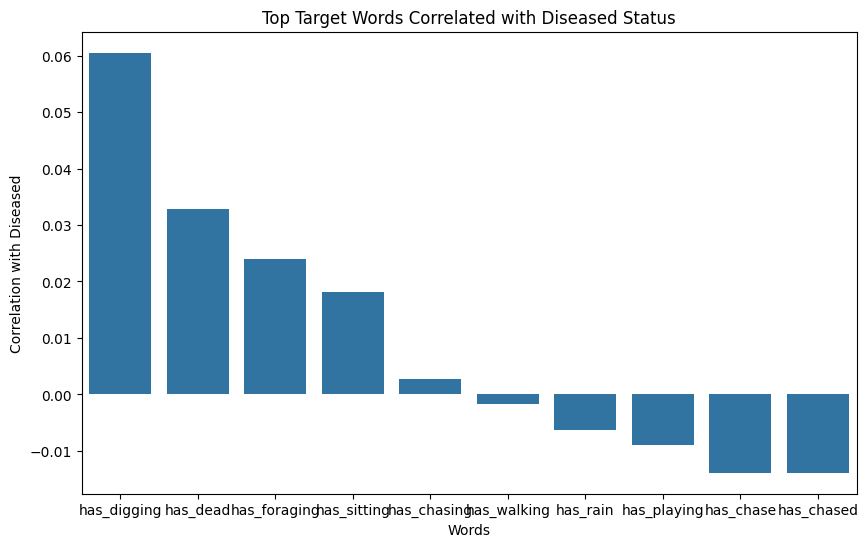

Updated dataset with target word features saved as 'combined_squirrel_data_with_target_word_features.csv'


In [13]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Load the combined dataset (assuming it includes a 'Diseased' column and the open-text column 'Notes')
combined_data = pd.read_csv('final_combined_squirrel_data_with_weather_filtered.csv')

# Step 1: Preprocess the Text
combined_data['Other Activities'] = combined_data['Other Activities'].fillna('').str.lower()  # Fill NaNs and lowercase text
combined_data['Other Activities'] = combined_data['Other Activities'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))  # Clean text

# Step 2: Define Specific Words to Look For
# Example: Words that might indicate sickness symptoms or behaviors
target_words = ["running","chase","chased","","hiding","chasing","sneeze","dead","sneezed", "rain","wet","chilly","cold", "cough", "weak", "limp", "injured", "wound", "infection", "sick", "dull", "shivering", "digging", "sitting", "walking", "burying", "playing", "foraging"]

# Step 3: Create Binary Features for Each Target Word
# For each word in target_words, create a binary column indicating its presence in 'Notes'
for word in target_words:
    combined_data[f'has_{word}'] = combined_data['Other Activities'].apply(lambda x: 1 if word in x else 0)

# Step 4: Correlation Analysis with 'Diseased' Status
# Calculate correlations between each target word feature and the 'Diseased' column
correlations = combined_data[[f'has_{word}' for word in target_words] + ['Diseased']].corr()['Diseased'].sort_values(ascending=False)

# Display correlations for each target word with 'Diseased' status
print("Correlations of specific words with Diseased status:\n", correlations)

# Visualize top correlated words with Diseased status
top_correlated_words = correlations.index[1:11]  # Exclude 'Diseased' itself
plt.figure(figsize=(10, 6))
sns.barplot(x=top_correlated_words, y=correlations.loc[top_correlated_words].values)
plt.title("Top Target Words Correlated with Diseased Status")
plt.xlabel("Words")
plt.ylabel("Correlation with Diseased")
plt.show()

# Save the updated data with specific word features
combined_data.to_csv('combined_squirrel_data_with_target_word_features.csv', index=False)
print("Updated dataset with target word features saved as 'combined_squirrel_data_with_target_word_features.csv'")

In [6]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Load the combined dataset (assuming it includes a 'Diseased' column and the open-text column 'Notes')
combined_data = pd.read_csv('final_combined_squirrel_data_with_weather_filtered.csv')

# Step 1: Preprocess the Text
combined_data['Specific Location'] = combined_data['Specific Location'].fillna('').str.lower()  # Fill NaNs and lowercase text
combined_data['Specific Location'] = combined_data['Specific Location'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))  # Clean text

# Step 2: Define Specific Words to Look For
# Example: Words that might indicate sickness symptoms or behaviors
target_words = ["ground","stump","roots","under","tree","branch","bush","hiding","rock","bench", "behind","climbing","bottom","up", "walking", "high", "rock", "lawn", "ran", "run", "running"]

# Step 3: Create Binary Features for Each Target Word
# For each word in target_words, create a binary column indicating its presence in 'Notes'
for word in target_words:
    combined_data[f'has_{word}'] = combined_data['Specific Location'].apply(lambda x: 1 if word in x else 0)

# Step 4: Correlation Analysis with 'Diseased' Status
# Calculate correlations between each target word feature and the 'Diseased' column
correlations = combined_data[[f'has_{word}' for word in target_words] + ['Diseased']].corr()['Diseased'].sort_values(ascending=False)

# Display correlations for each target word with 'Diseased' status
print("Correlations of specific words with Diseased status:\n", correlations)

# Visualize top correlated words with Diseased status
top_correlated_words = correlations.index[1:11]  # Exclude 'Diseased' itself
plt.figure(figsize=(10, 6))
sns.barplot(x=top_correlated_words, y=correlations.loc[top_correlated_words].values)
plt.title("Top Target Words Correlated with Diseased Status")
plt.xlabel("Words")
plt.ylabel("Correlation with Diseased")
plt.show()

# Save the updated data with specific word features
combined_data.to_csv('combined_squirrel_data_with_target_word_features.csv', index=False)
print("Updated dataset with target word features saved as 'combined_squirrel_data_with_target_word_features.csv'")

Correlations of specific words with Diseased status:
 Diseased        1.000000
has_walking     0.052603
has_roots       0.052603
has_bench       0.050214
has_ran         0.037452
has_branch      0.036599
has_running     0.017428
has_behind      0.017428
has_rock        0.013990
has_rock        0.013990
has_bottom      0.012313
has_lawn        0.010064
has_under       0.009833
has_climbing    0.008680
has_high        0.008680
has_run         0.005347
has_ground      0.005347
has_bush        0.002706
has_hiding     -0.006272
has_stump      -0.006272
has_up         -0.007841
has_tree       -0.025779
Name: Diseased, dtype: float64


ValueError: All arrays must be of the same length

<Figure size 1000x600 with 0 Axes>

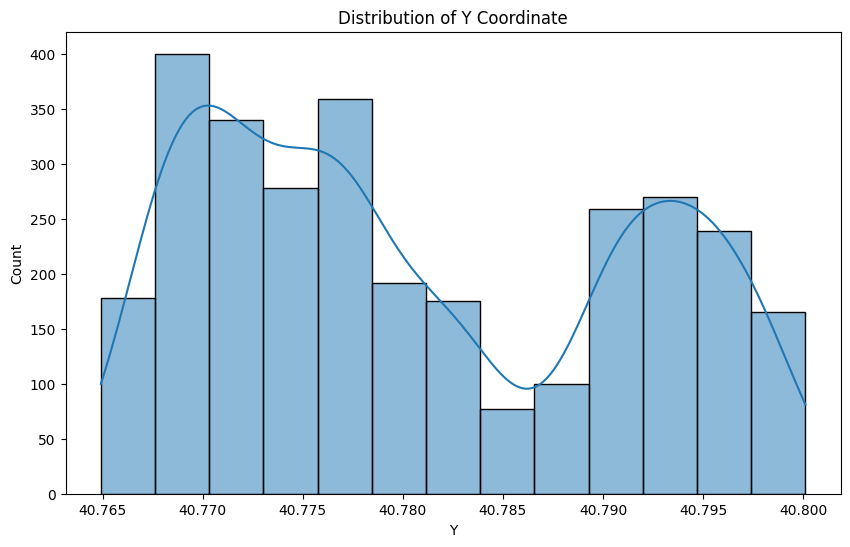

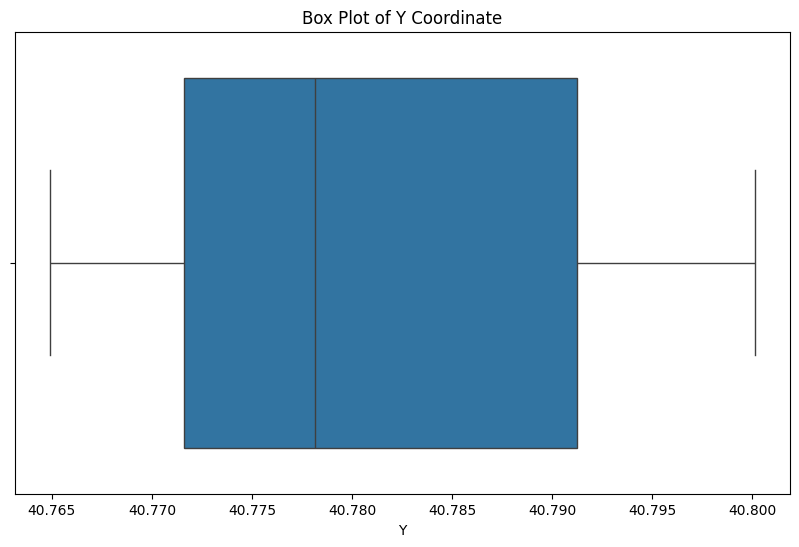

In [80]:
# Plotting a histogram for a numeric feature
plt.figure(figsize=(10, 6))
sns.histplot(data=final_combined_data, x="Y", kde=True)
plt.title('Distribution of Y Coordinate')
plt.show()

# Boxplot for visual inspection of outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=final_combined_data['Y'])
plt.title('Box Plot of Y Coordinate')
plt.show()

In [85]:
final_combined_data['Unique Squirrel ID'].value_counts

<bound method IndexOpsMixin.value_counts of 0       37F-PM-1014-03
1       21B-AM-1019-04
2       11B-PM-1014-08
3       32E-PM-1017-14
4       13E-AM-1017-05
             ...      
3027    30B-AM-1007-04
3028    19A-PM-1013-05
3029    22D-PM-1012-07
3030    29B-PM-1010-02
3031     5E-PM-1012-01
Name: Unique Squirrel ID, Length: 3032, dtype: object>

In [88]:
#check for noise in hectare column 
final_combined_data['Hectare'].value_counts()


Hectare
14D    32
32E    30
14E    28
01B    27
07H    26
       ..
11C     1
23D     1
26B     1
24B     1
30F     1
Name: count, Length: 339, dtype: int64

In [91]:
final_combined_data['Date'].value_counts()

Date
2018-10-13    434
2018-10-07    405
2018-10-14    372
2018-10-06    342
2018-10-10    335
2018-10-08    285
2018-10-12    218
2018-10-17    216
2018-10-18    200
2018-10-19    158
2018-10-20     67
Name: count, dtype: int64

In [93]:
pd.date_range(start="2018-10-01", end="2018-10-31").difference(final_combined_data['Date'])


DatetimeIndex(['2018-10-01', '2018-10-02', '2018-10-03', '2018-10-04',
               '2018-10-05', '2018-10-09', '2018-10-11', '2018-10-15',
               '2018-10-16', '2018-10-21', '2018-10-22', '2018-10-23',
               '2018-10-24', '2018-10-25', '2018-10-26', '2018-10-27',
               '2018-10-28', '2018-10-29', '2018-10-30', '2018-10-31'],
              dtype='datetime64[ns]', freq=None)

<Axes: >

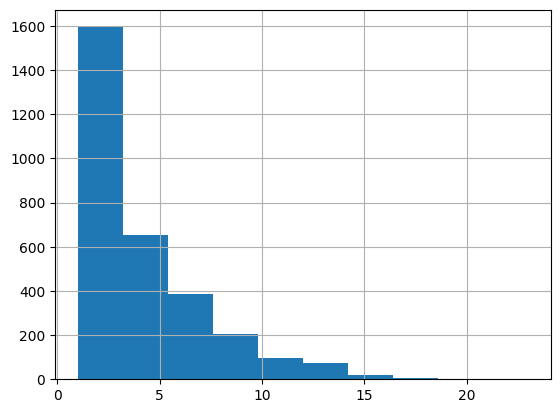

In [94]:
final_combined_data['Hectare Squirrel Number'].hist()

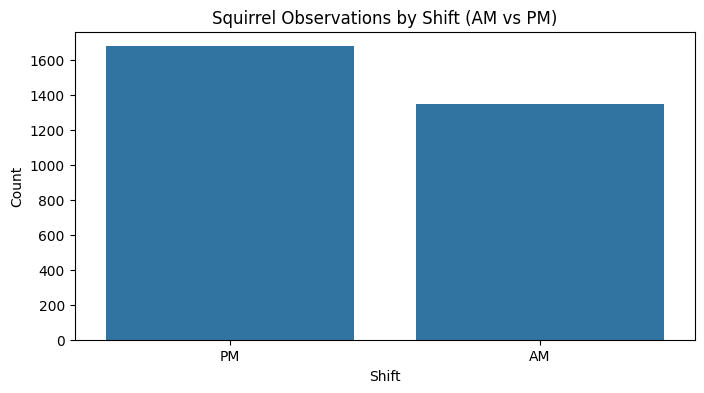

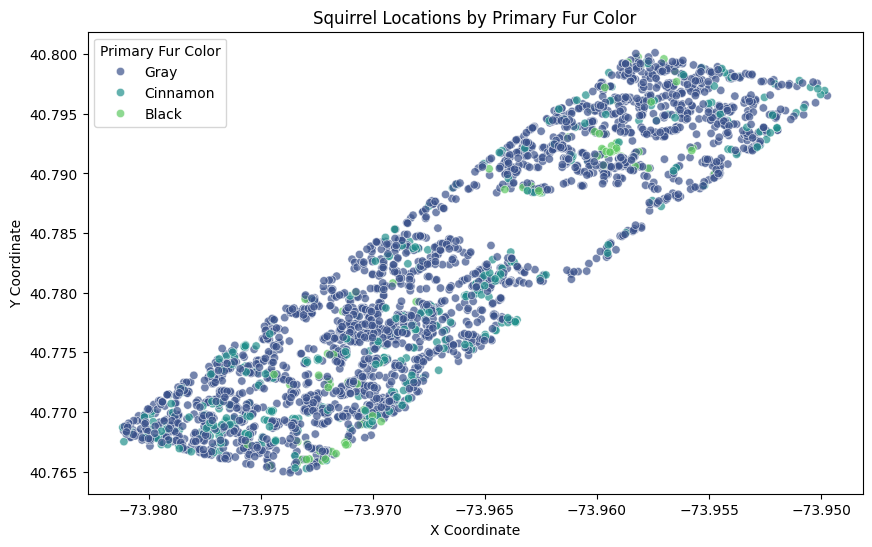

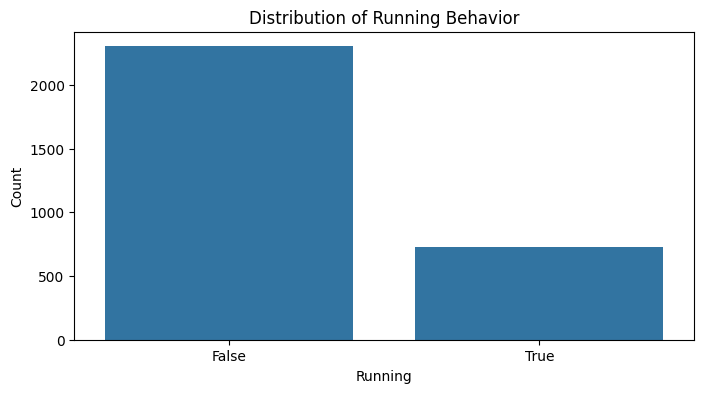

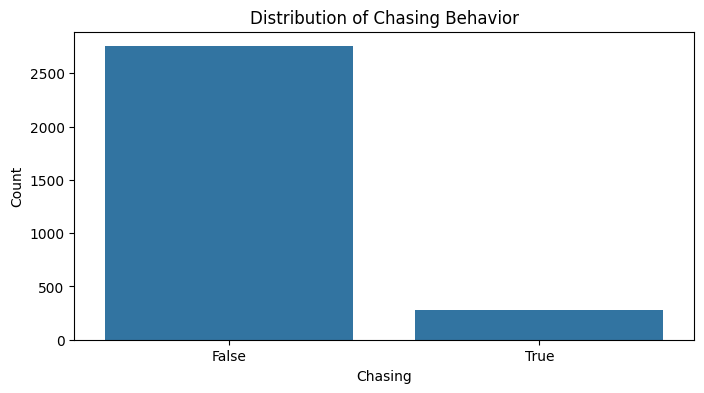

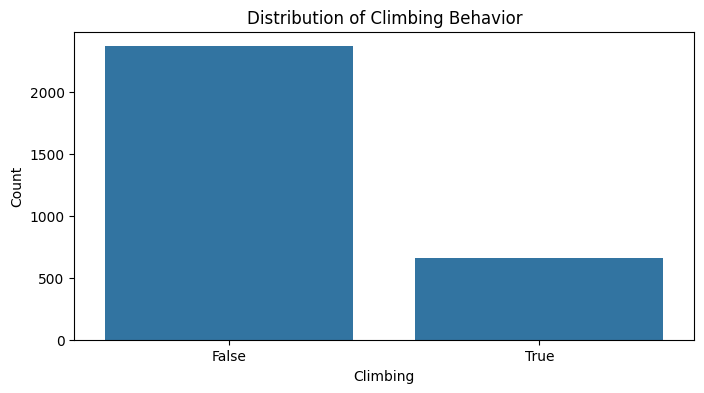

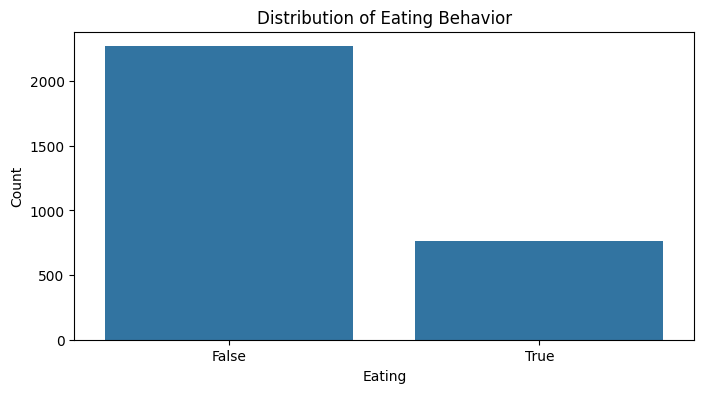

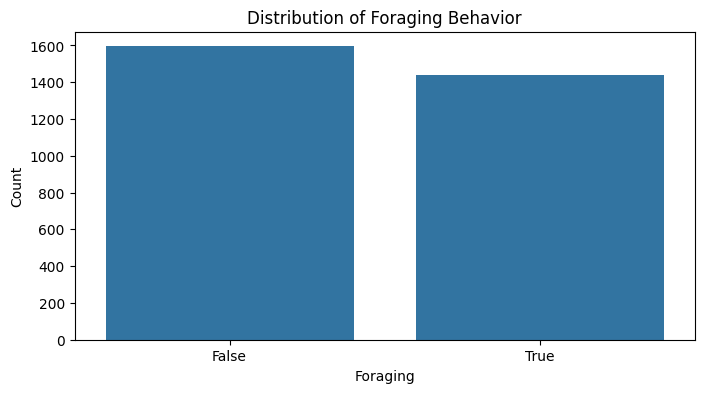

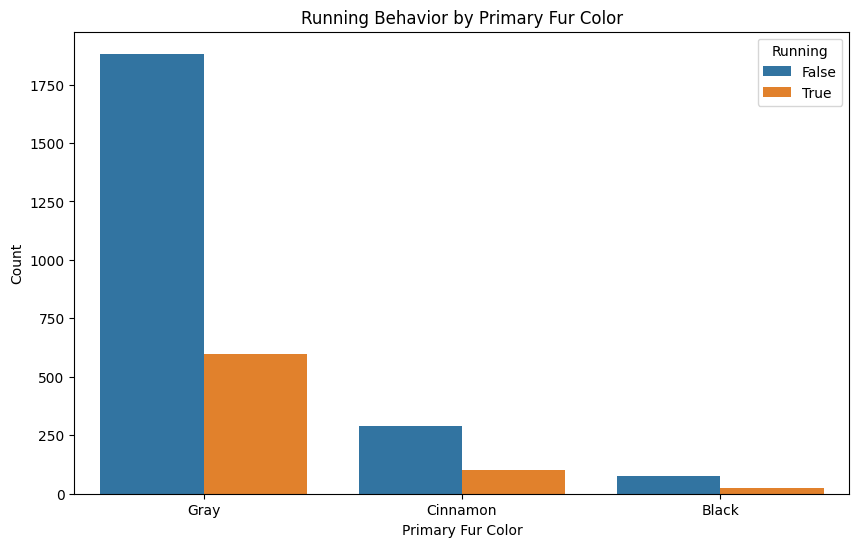

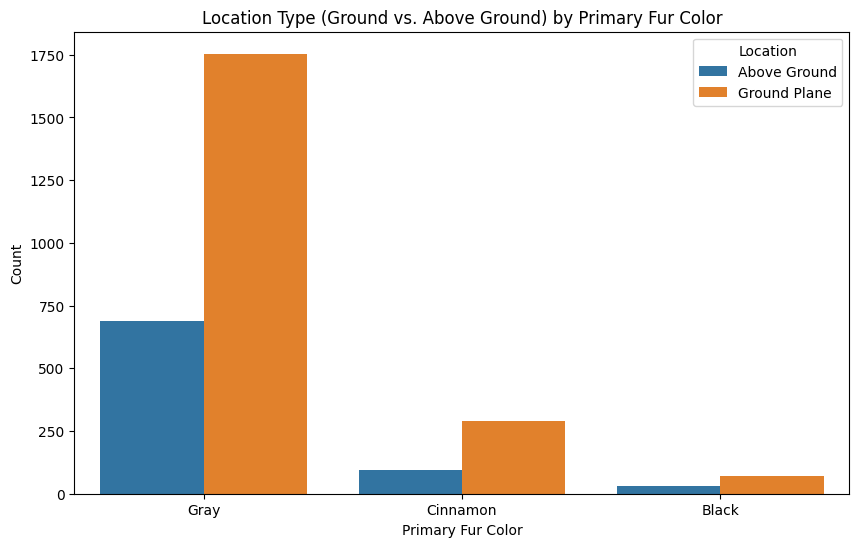

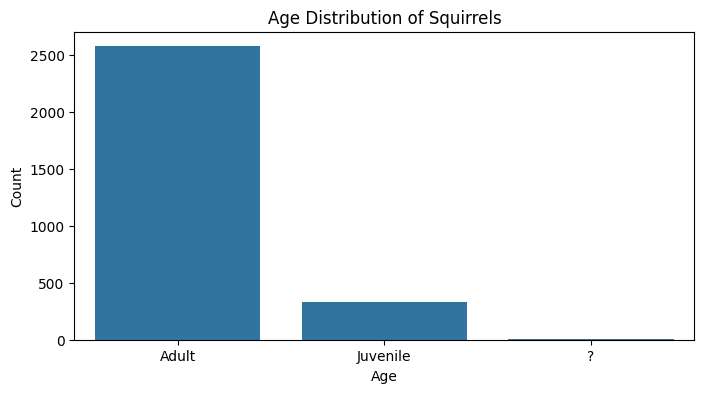

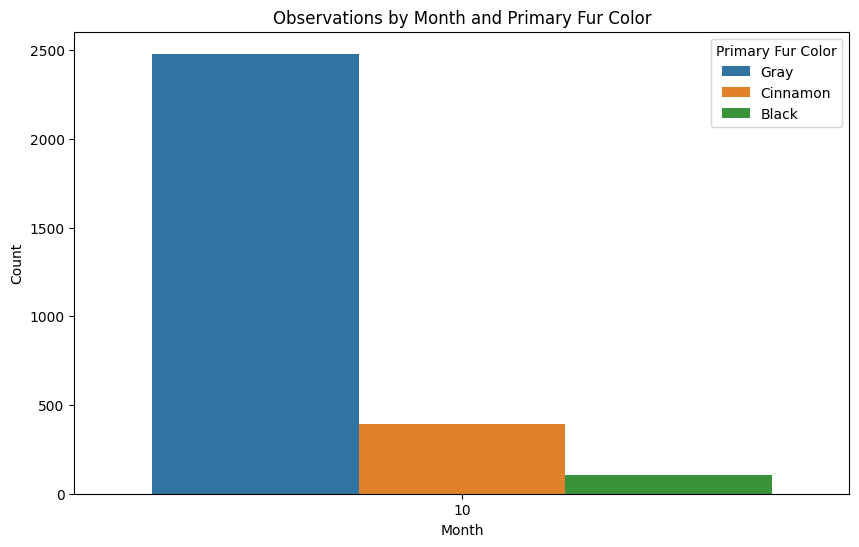

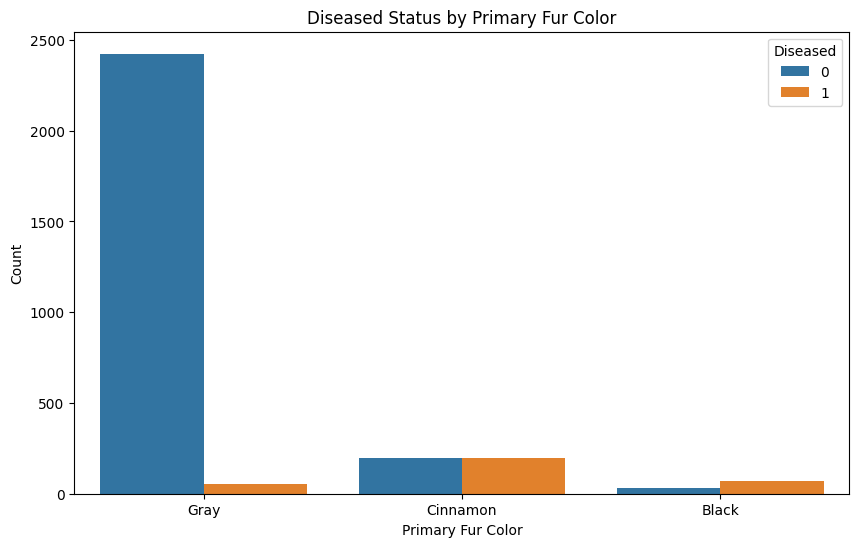

In [71]:
# 1. Count plot of Shift (AM/PM) to see when squirrels were more active
plt.figure(figsize=(8, 4))
sns.countplot(data=combined_data, x="Shift")
plt.title('Squirrel Observations by Shift (AM vs PM)')
plt.xlabel("Shift")
plt.ylabel("Count")
plt.show()

# 2. Scatter plot of squirrel locations in the park (X and Y coordinates)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x="X", y="Y", hue="Primary Fur Color", alpha=0.7, palette="viridis")
plt.title("Squirrel Locations by Primary Fur Color")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend(title="Primary Fur Color")
plt.show()

# 3. Behavior distribution - count plots for main behavioral flags (Running, Chasing, Climbing, etc.)
behavioral_flags = ["Running", "Chasing", "Climbing", "Eating", "Foraging"]
for behavior in behavioral_flags:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=combined_data, x=behavior)
    plt.title(f'Distribution of {behavior} Behavior')
    plt.xlabel(behavior)
    plt.ylabel("Count")
    plt.show()

# 4. Running Behavior by Primary Fur Color
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data, x="Primary Fur Color", hue="Running")
plt.title("Running Behavior by Primary Fur Color")
plt.xlabel("Primary Fur Color")
plt.ylabel("Count")
plt.legend(title="Running")
plt.show()

# 5. Location (ground vs. above ground) distribution by Primary Fur Color
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data, x="Primary Fur Color", hue="Location")
plt.title("Location Type (Ground vs. Above Ground) by Primary Fur Color")
plt.xlabel("Primary Fur Color")
plt.ylabel("Count")
plt.legend(title="Location")
plt.show()

# 6. Age Distribution - Visualize age categories to understand demographics
plt.figure(figsize=(8, 4))
sns.countplot(data=combined_data, x="Age")
plt.title("Age Distribution of Squirrels")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 7. Month of Observation vs. Primary Fur Color
# Extract the month from the Date column for visualization
combined_data['Month'] = pd.to_datetime(combined_data['Date'], errors='coerce').dt.month

plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data, x="Month", hue="Primary Fur Color")
plt.title("Observations by Month and Primary Fur Color")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(title="Primary Fur Color")
plt.show()

# 8. Diseased Status by Primary Fur Color to see any trends in health
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data, x="Primary Fur Color", hue="Diseased")
plt.title("Diseased Status by Primary Fur Color")
plt.xlabel("Primary Fur Color")
plt.ylabel("Count")
plt.legend(title="Diseased")
plt.show()

## Explore the Data (Squirrel Data)

1. **Data Copy and Downsampling**: A sample of 10% of the dataset was created for exploration, as the full dataset size was manageable for analysis.

2. **Attribute Study**: A detailed summary has been provided in the **Attribute Summary** table, showing the name, type, percentage of missing values, and initial notes on each attribute’s distribution and usefulness. Here’s a quick breakdown:
   - **Numerical Attributes**: `X`, `Y`, `Date`, and `Hectare Squirrel Number` mostly follow non-Gaussian distributions.
   - **Categorical Attributes**: Many behavioral flags (`Running`, `Chasing`, etc.) are boolean and may benefit from encoding if used in a model.
   - **Missing Values**: Attributes like `Highlight Fur Color` and `Color notes` have high missing values.

3. **Target Attribute**: For a classification task, `Primary Fur Color` could serve as the target variable.

4. **Data Visualization**: The distributions of numerical and categorical attributes (such as `Primary Fur Color`) were visualized to understand their characteristics.

5. **Attribute Correlations**: The correlation matrix revealed:
   - **High correlation** between `X` and `Y`, indicating that these location coordinates have a relationship.
   - **Weak to negligible correlations** among other numerical attributes.

6. **Manual Problem Solving**: A manual approach would involve categorizing squirrels by visual features (like fur color and age) and observing patterns in behavior manually recorded. This process could then be extended to examine behavioral or demographic patterns among squirrels of different types.

7. **Promising Transformations**:
   - **Encoding** categorical variables (like `Shift` and boolean flags for behavior).
   - **Date Feature Engineering**: Breaking `Date` into day, month, and year components to explore any temporal trends.
   - **Handling Missing Values**: For features with significant missing values, imputation or exclusion may be necessary, depending on the importance.

8. **Additional Data Needs**:
   - **Weather Data**: Adding temperature and precipitation data for specific dates could provide insights into how weather affects squirrel behaviors.
   - **Human Activity Data**: Information on human foot traffic or events in Central Park may influence squirrel behavior patterns.

Correlations with Diseased Status:
 Diseased                   1.000000
Hectare Squirrel Number    0.050921
X                         -0.027197
Y                         -0.048058
Name: Diseased, dtype: float64


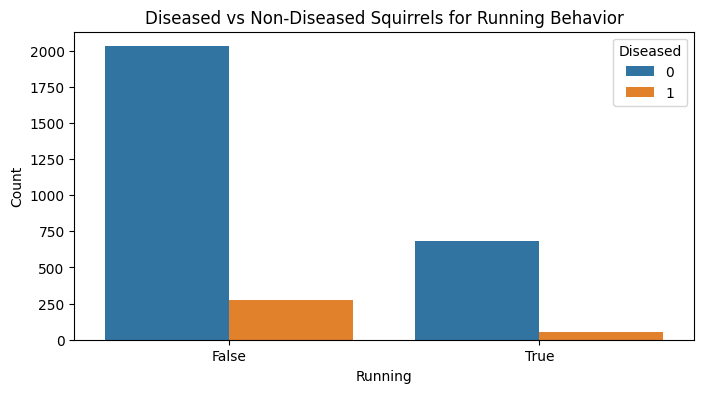

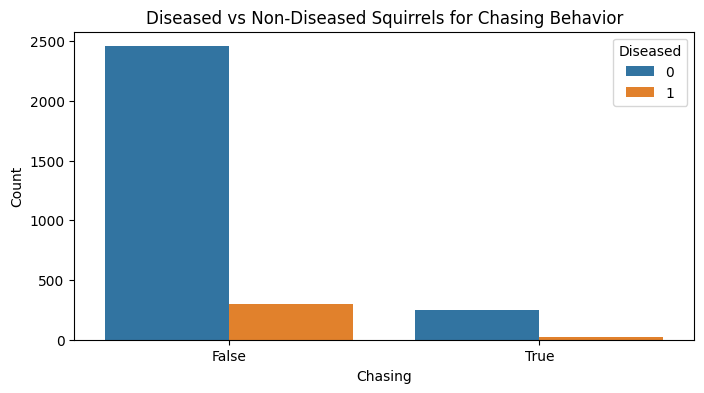

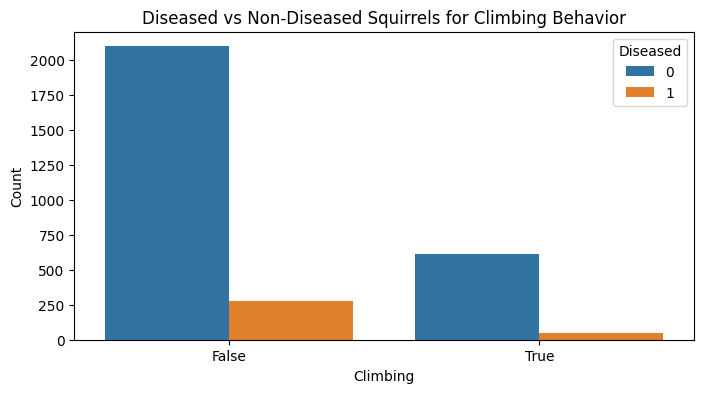

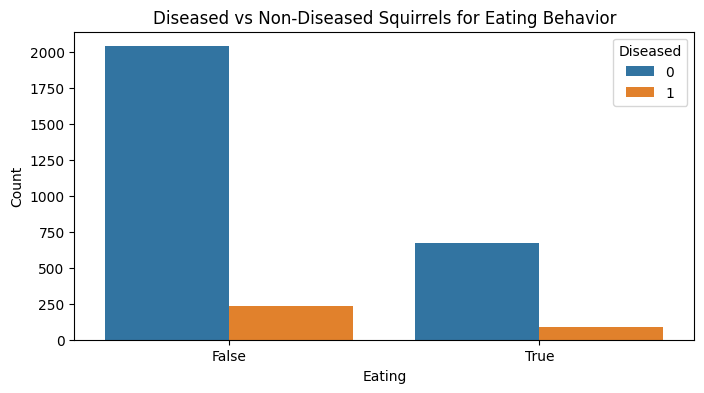

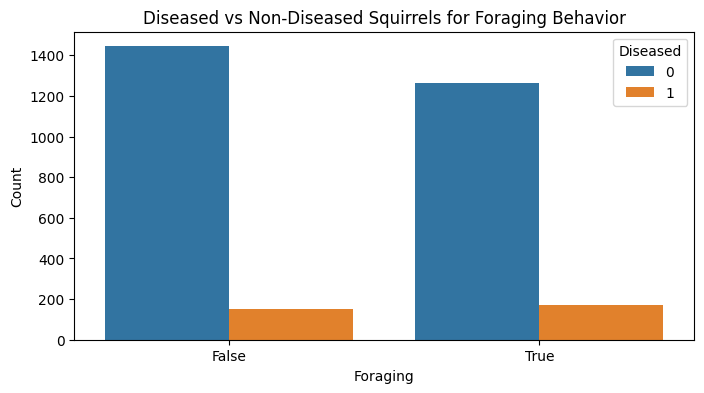

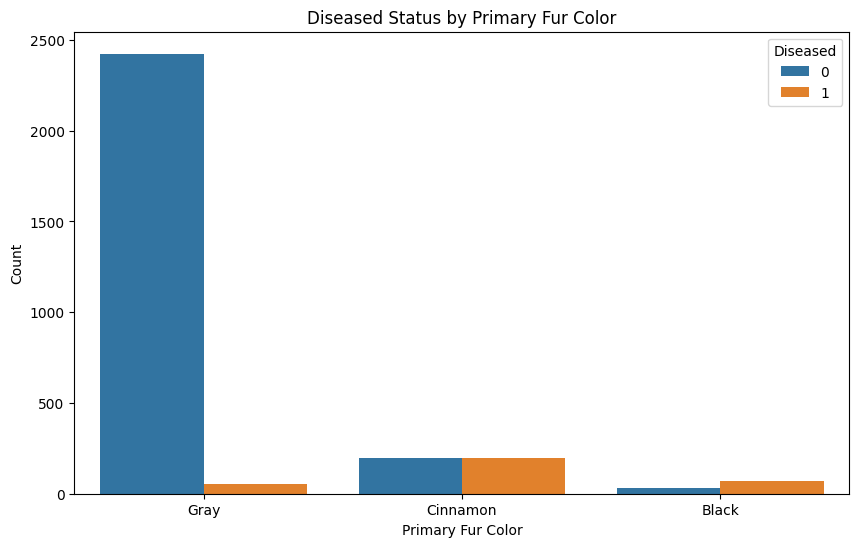

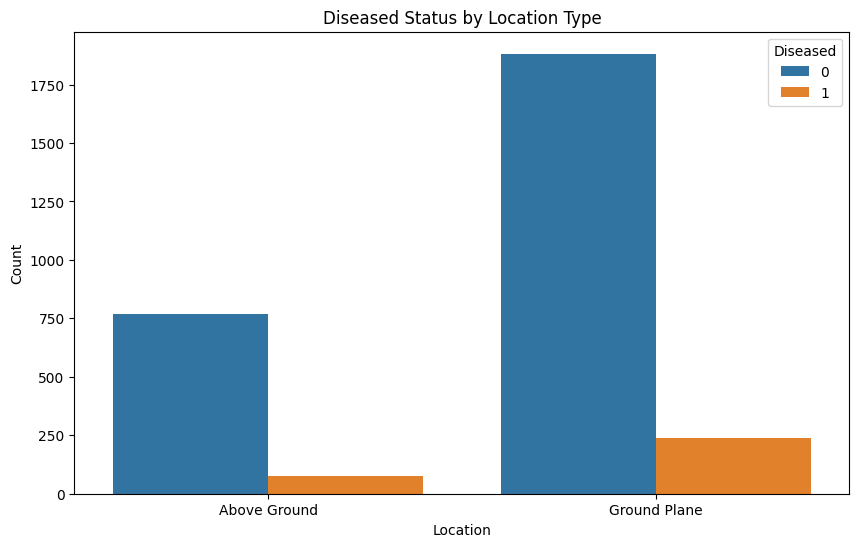

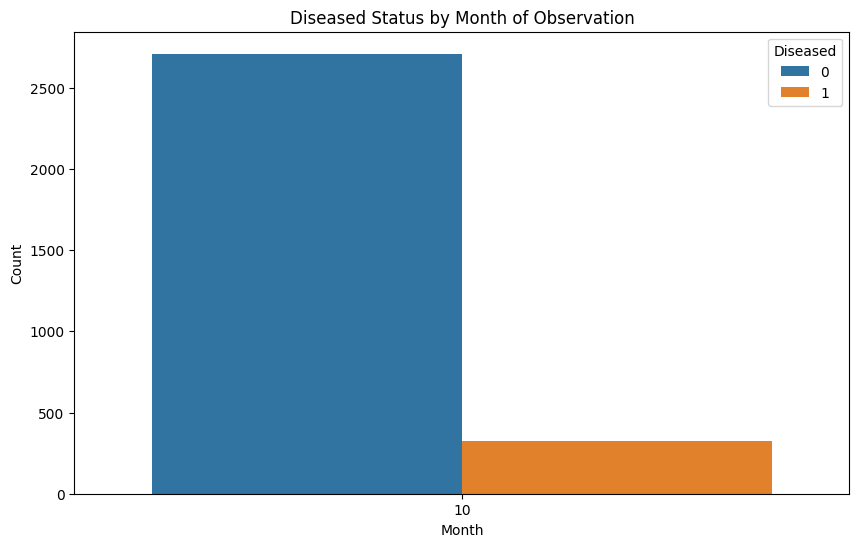

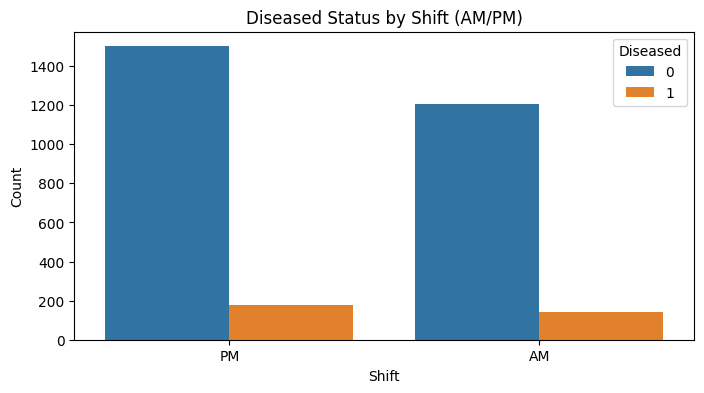

In [72]:
# Correlations

# Convert Date to datetime format and extract month for time-based analysis
combined_data['Date'] = pd.to_datetime(combined_data['Date'], errors='coerce')
combined_data['Month'] = combined_data['Date'].dt.month

# 1. Correlation Analysis with Numerical Features
# Add 'Diseased' as an integer feature if not already
combined_data['Diseased'] = combined_data['Diseased'].astype(int)
numerical_features = combined_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix focusing on 'Diseased'
correlation_matrix = combined_data[numerical_features].corr()
diseased_correlation = correlation_matrix['Diseased'].sort_values(ascending=False)

# Display correlations with 'Diseased' status
print("Correlations with Diseased Status:\n", diseased_correlation)

# 2. Behavioral Comparison - Plotting behavioral patterns for diseased vs. non-diseased squirrels
behavioral_flags = ["Running", "Chasing", "Climbing", "Eating", "Foraging"]
for behavior in behavioral_flags:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=combined_data, x=behavior, hue="Diseased")
    plt.title(f'Diseased vs Non-Diseased Squirrels for {behavior} Behavior')
    plt.xlabel(behavior)
    plt.ylabel("Count")
    plt.legend(title="Diseased")
    plt.show()

# 3. Fur Color vs Diseased Status
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data, x="Primary Fur Color", hue="Diseased")
plt.title("Diseased Status by Primary Fur Color")
plt.xlabel("Primary Fur Color")
plt.ylabel("Count")
plt.legend(title="Diseased")
plt.show()

# 4. Location Type (Ground vs. Above Ground) vs Diseased Status
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data, x="Location", hue="Diseased")
plt.title("Diseased Status by Location Type")
plt.xlabel("Location")
plt.ylabel("Count")
plt.legend(title="Diseased")
plt.show()

# 5. Month vs. Diseased Status
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data, x="Month", hue="Diseased")
plt.title("Diseased Status by Month of Observation")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(title="Diseased")
plt.show()

# 6. Shift (AM/PM) vs Diseased Status
plt.figure(figsize=(8, 4))
sns.countplot(data=combined_data, x="Shift", hue="Diseased")
plt.title("Diseased Status by Shift (AM/PM)")
plt.xlabel("Shift")
plt.ylabel("Count")
plt.legend(title="Diseased")
plt.show()

In [8]:

# Group by 'Primary Fur Color' and calculate the mean disease rate for each color
disease_rate_by_fur_color = combined_data.groupby('Primary Fur Color')['Diseased'].mean() * 100

# Display the disease rates by primary fur color
print("Disease Rates by Primary Fur Color:")
print(disease_rate_by_fur_color)

Disease Rates by Primary Fur Color:
Primary Fur Color
Black       66.990291
Cinnamon    49.492386
Gray         2.258065
Name: Diseased, dtype: float64


Black squirrels have the highest diseased rate per population at 66.99%, Cinnamon being second at 49.49% and Gray being the third at 2.25%

In [10]:


# Filter for diseased squirrels with gray primary fur color
diseased_gray_squirrels = combined_data[(combined_data['Diseased'] == 1) & 
                                        (combined_data['Primary Fur Color'] == 'Gray')]

# Count the number of such squirrels
count_diseased_gray_squirrels = diseased_gray_squirrels.shape[0]

# Display the result
print("Total number of diseased squirrels with a gray primary fur color:")
print(count_diseased_gray_squirrels)

Total number of diseased squirrels with a gray primary fur color:
56


In [9]:


# Filter for diseased squirrels with gray primary fur color and a highlight fur color of cinnamon or black
diseased_gray_with_highlight = combined_data[
    (combined_data['Diseased'] == 1) & 
    (combined_data['Primary Fur Color'] == 'Gray') & 
    (combined_data['Highlight Fur Color'].isin(['Cinnamon', 'Black']))
]

# Count the number of such squirrels
count_diseased_gray_with_highlight = diseased_gray_with_highlight.shape[0]

# Display the result
print("Number of diseased squirrels with a gray primary fur color and a cinnamon or black highlight fur color:")
print(count_diseased_gray_with_highlight)

Number of diseased squirrels with a gray primary fur color and a cinnamon or black highlight fur color:
22


In [15]:
# Clean and standardize the 'Combination of Primary and Highlight Color' column
combined_data['Combination of Primary and Highlight Color'] = (
    combined_data['Combination of Primary and Highlight Color']
    .str.replace(" ", "", regex=False)  # Remove all spaces
    .str.lower()  # Convert to lowercase for case-insensitive matching
)

# Define color combinations of interest
color_combinations = [
    'gray+black', 'black+gray', 'gray+cinnamon', 'cinnamon+gray', 
    'black+cinnamon', 'cinnamon+black', 'gray+cinnamon,white', 'gray+white',
    'gray+black,cinnamon,white', 'gray+black,white', 'cinnamon+gray,white'
]

# Initialize a dictionary to store results
results = {}

# Loop through each color combination, calculate count and disease percentage
for combination in color_combinations:
    # Filter for squirrels with the specified color combination
    filtered_squirrels = combined_data[combined_data['Combination of Primary and Highlight Color'] == combination]
    
    # Total count of squirrels with this color combination
    total_count = filtered_squirrels.shape[0]
    
    # Disease percentage for this color combination
    if total_count > 0:
        disease_percentage = (filtered_squirrels['Diseased'].mean()) * 100
    else:
        disease_percentage = 0  # If no squirrels with this combination, set percentage to 0
    
    # Store the results
    results[combination] = {'Total Count': total_count, 'Disease Percentage': disease_percentage}

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results).T

# Display the results
print("Disease rates for specified color combinations:")
print(results_df)

Disease rates for specified color combinations:
                           Total Count  Disease Percentage
gray+black                        24.0            0.000000
black+gray                         8.0           62.500000
gray+cinnamon                    755.0            2.913907
cinnamon+gray                    162.0           43.827160
black+cinnamon                    15.0           73.333333
cinnamon+black                    10.0           80.000000
gray+cinnamon,white              267.0            2.621723
gray+white                       489.0            1.635992
gray+black,cinnamon,white         32.0            6.250000
gray+black,white                   7.0            0.000000
cinnamon+gray,white               59.0           55.932203


In [22]:
# Define keywords for ground status
ground_keywords = ['Ground', 'bush', 'stump', 'roots', 'under', 'bottom', 'rock', 'bench', 'plane', 
                   'grass', 'trash', 'behind', 'near', 'lawn']

# Function to categorize ground status based on keywords
def categorize_ground_status(location, specific_location):
    if pd.notna(location) and 'Ground' in location:
        return 'Ground'
    if pd.notna(specific_location):
        for keyword in ground_keywords:
            if keyword in specific_location.lower():
                return 'Ground'
    return 'Unknown'

# Apply the function to create the 'Ground_Status' column
combined_data['Ground_Status'] = combined_data.apply(lambda row: categorize_ground_status(row['Location'], row['Specific Location']), axis=1)

# Filter for cinnamon and black squirrels that are on the ground
filtered_squirrels = combined_data[(combined_data['Primary Fur Color'].isin(['Cinnamon', 'Black'])) & 
                                   (combined_data['Ground_Status'] == 'Ground')]

# Calculate the disease rate for these filtered squirrels
disease_rate_filtered = filtered_squirrels['Diseased'].mean() * 100


# Display the result
print("Disease rate for Cinnamon and Black squirrels that are on the ground:")
print(f"{disease_rate_filtered:.2f}%")

Disease rate for Cinnamon and Black squirrels that are on the ground:
53.18%


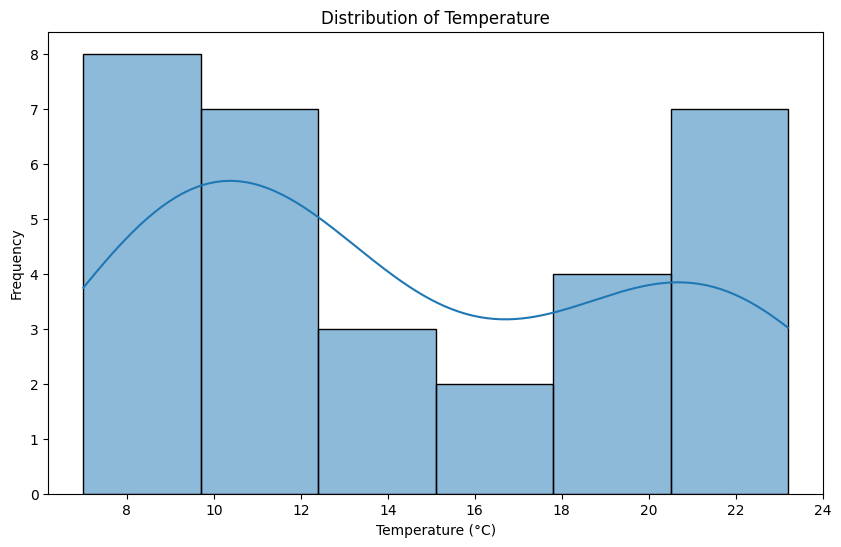

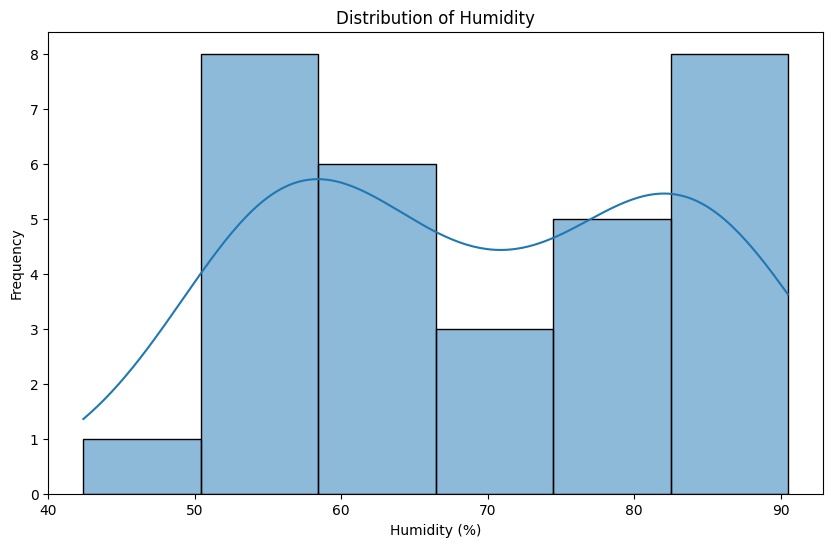

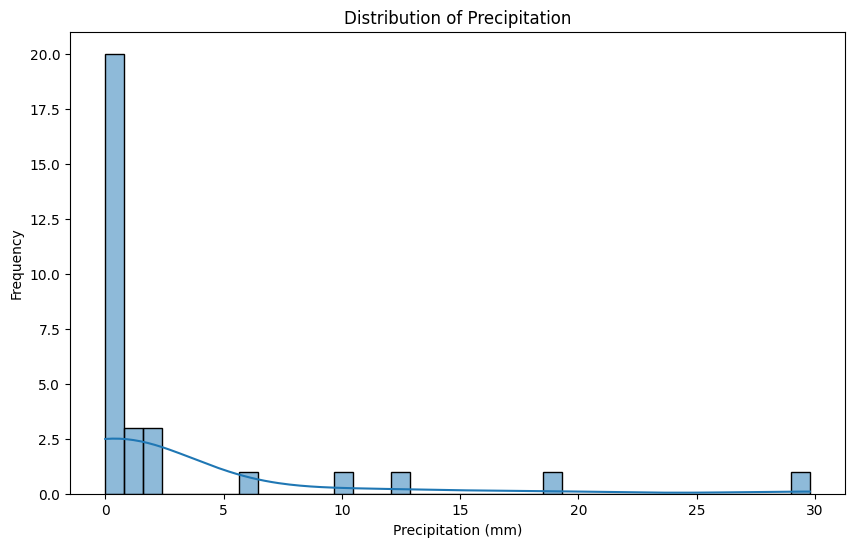

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Temperature Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=weather_data, x='temp', kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# Humidity Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=weather_data, x='humidity', kde=True)
plt.title('Distribution of Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.show()

# Precipitation Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=weather_data, x='precip', kde=True)
plt.title('Distribution of Precipitation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.show()


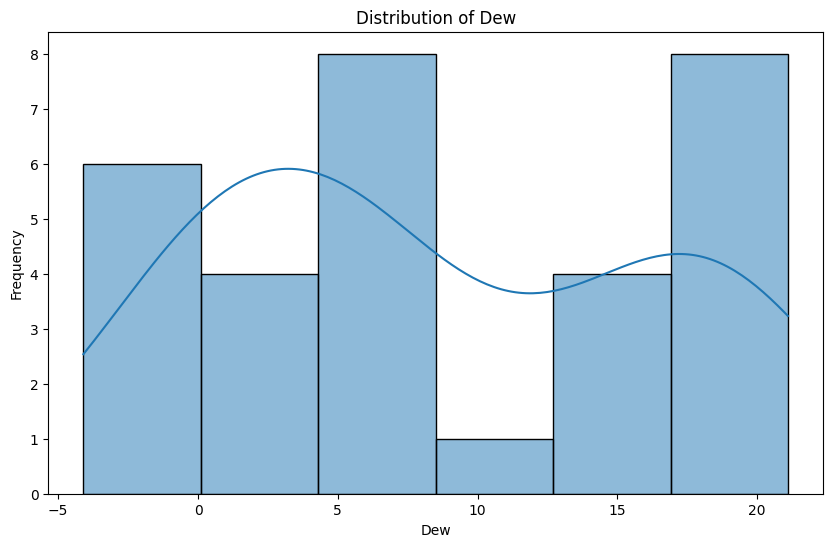

In [96]:
#check the distribution dew 
plt.figure(figsize=(10, 6))
sns.histplot(data=weather_data, x='dew', kde=True)
plt.title('Distribution of Dew')
plt.xlabel('Dew')
plt.ylabel('Frequency')
plt.show()


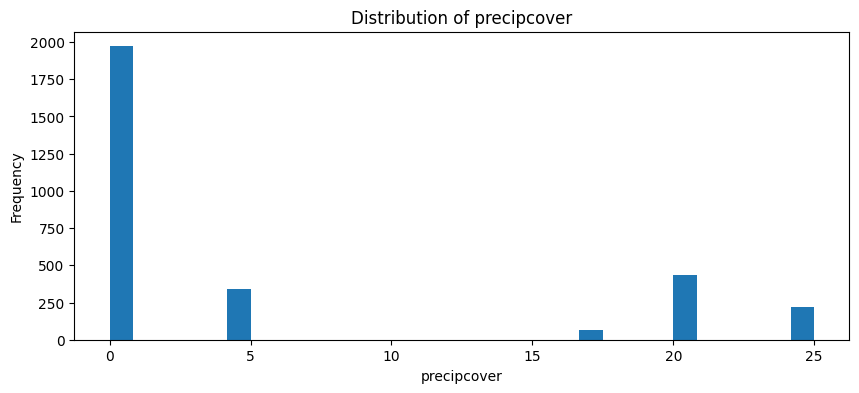

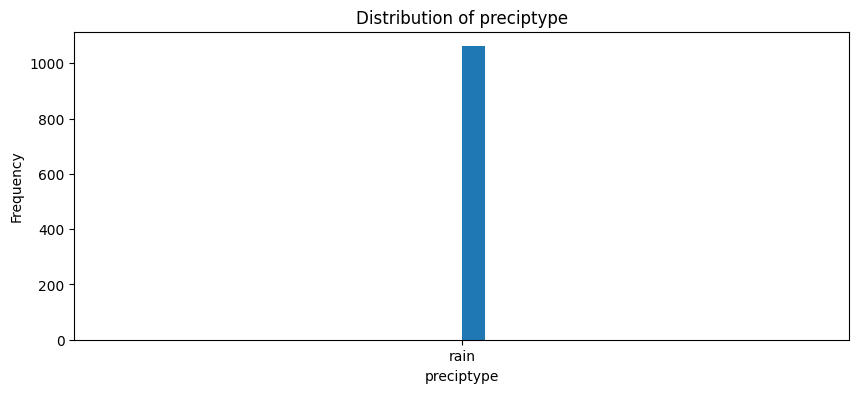

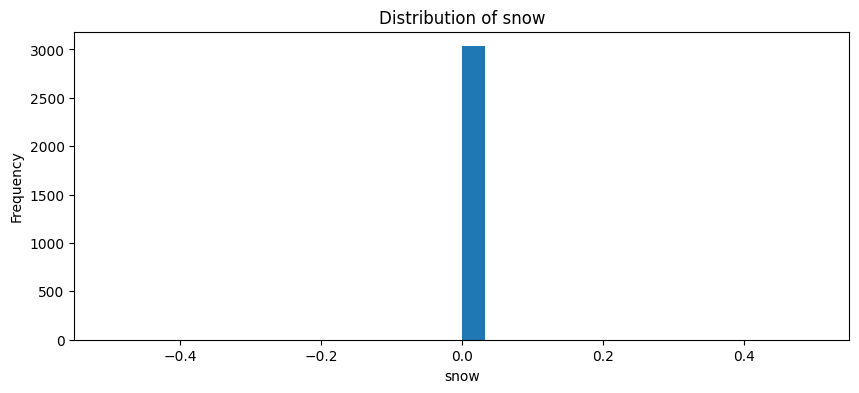

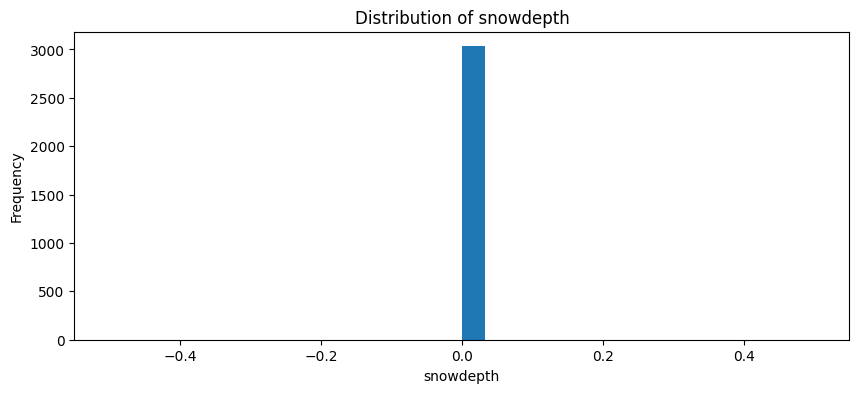

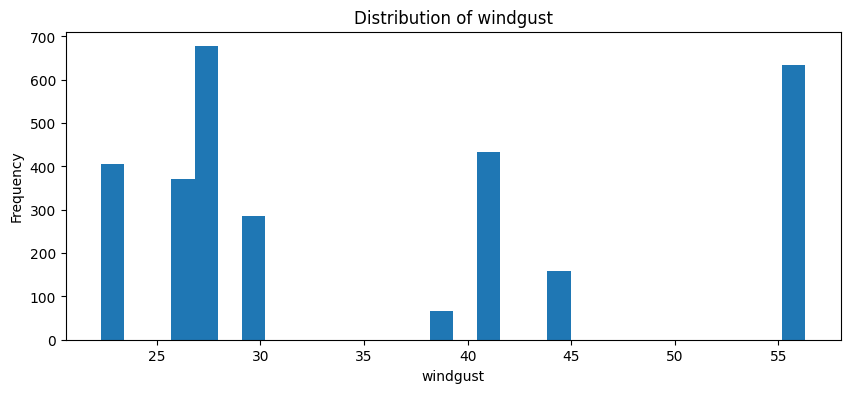

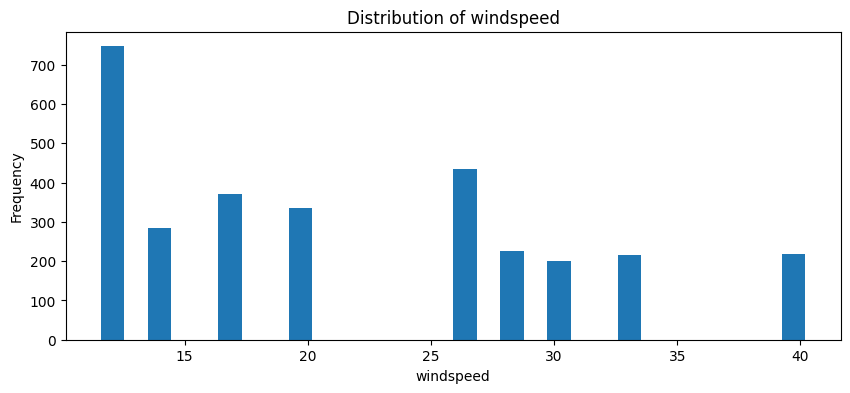

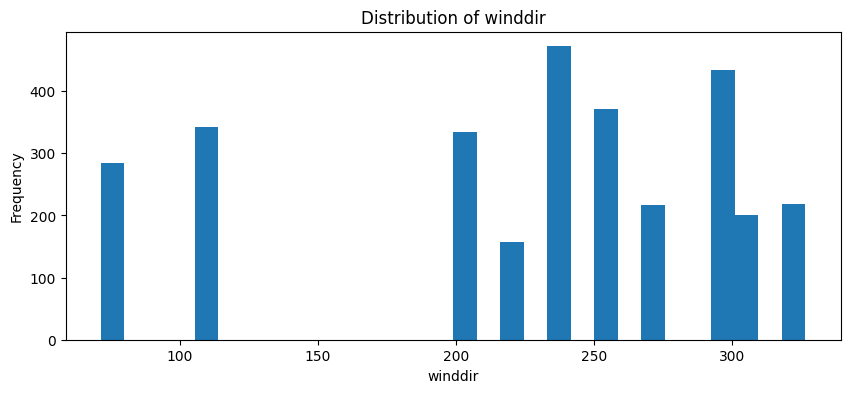

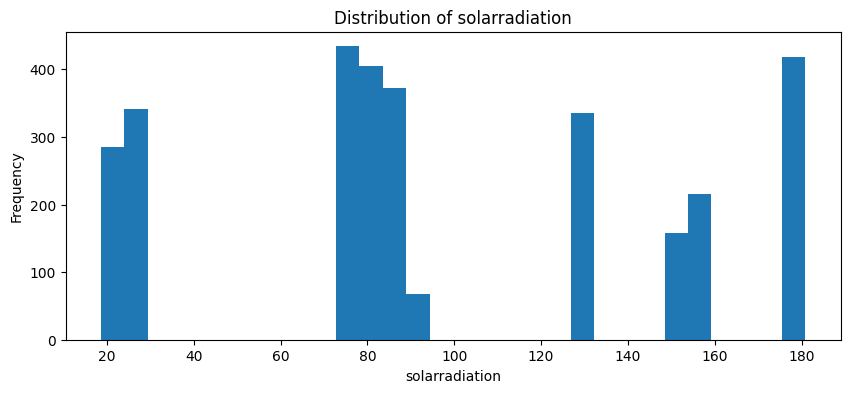

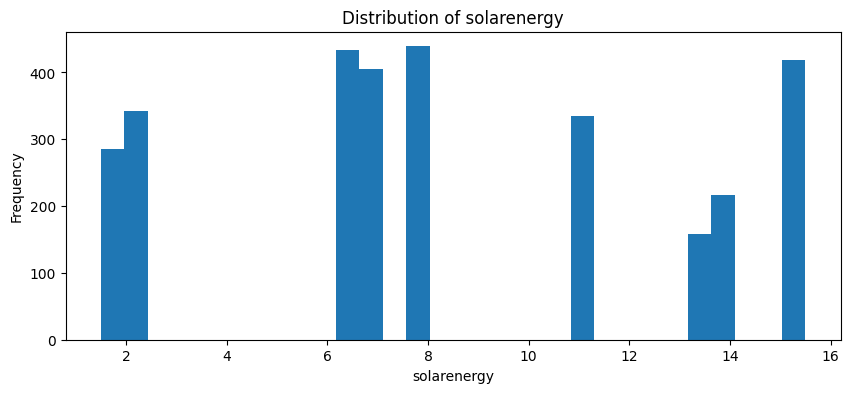

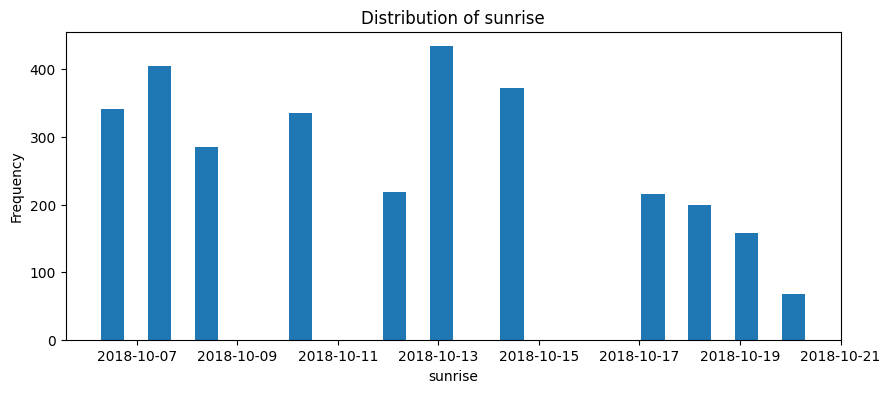

In [97]:

# List of features to check
features = [
    'precipcover', 'preciptype', 'snow', 'snowdepth', 
    'windgust', 'windspeed', 'winddir', 'solarradiation', 
    'solarenergy', 'sunrise'
]

# Plot histograms for each feature
for feature in features:
    plt.figure(figsize=(10, 4))
    final_combined_data[feature].hist(bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()


# Precipcover 
- There are smaller peaks at higher values (5, 10, 15, 20, 25), maybe could mean  higher precipitation coverage

# Preciptype
- only contains rain, (warmer days so their is no possibility of snow)



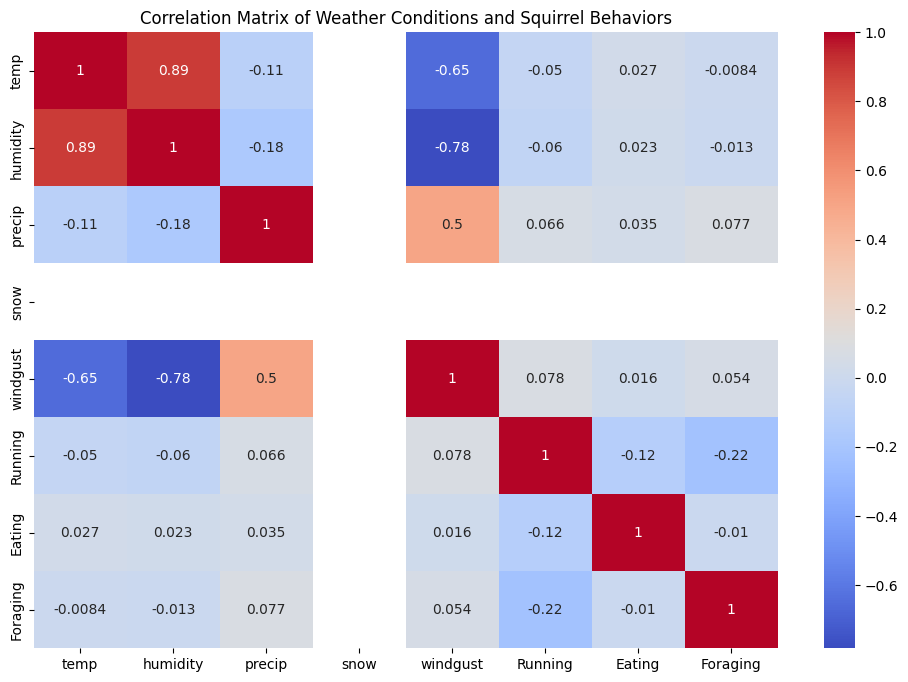

In [74]:
# Merge weather data with combined squirrel data on 'Date'
full_data = pd.merge(combined_data, weather_data, on='Date', how='left')

# Select relevant features for correlation analysis
features_to_analyze = ['temp', 'humidity', 'precip', 'snow', 'windgust', 'Running', 'Eating', 'Foraging']
correlation_matrix = full_data[features_to_analyze].corr()

# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Weather Conditions and Squirrel Behaviors')
plt.show()


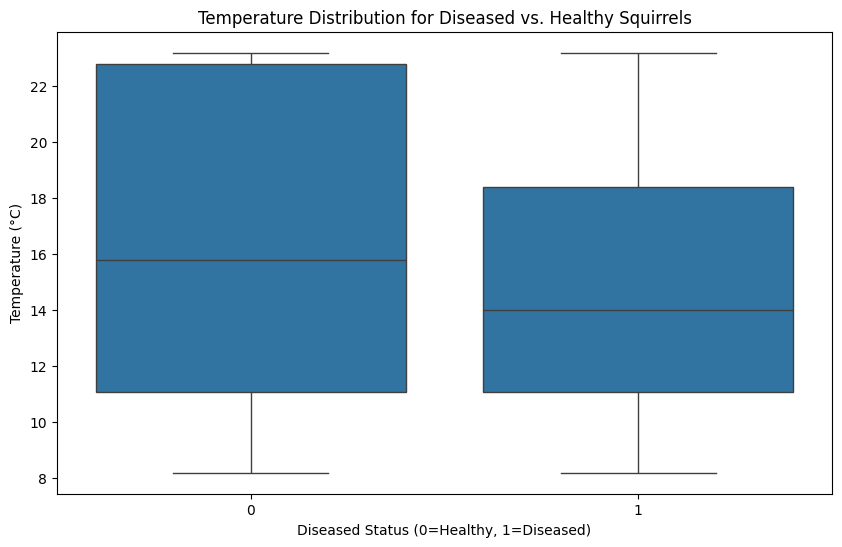

In [75]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=full_data, x='Diseased', y='temp')
plt.title('Temperature Distribution for Diseased vs. Healthy Squirrels')
plt.xlabel('Diseased Status (0=Healthy, 1=Diseased)')
plt.ylabel('Temperature (°C)')
plt.show()


- Median Temperature: Diseased squirrels have a slightly lower median temperature compared to healthy squirrels.
- Variability: Both healthy and diseased squirrels have a similar spread in terms of temperature, but the total range for diseased squirrels is more compressed, suggesting that these observations occur within a tighter temperature range.

/var/folders/88/l8n0bh9x3txf1gg8y3yrd6x40000gp/T/ipykernel_80578/3743128184.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=full_data, x='Day', y='temp', ci=None)


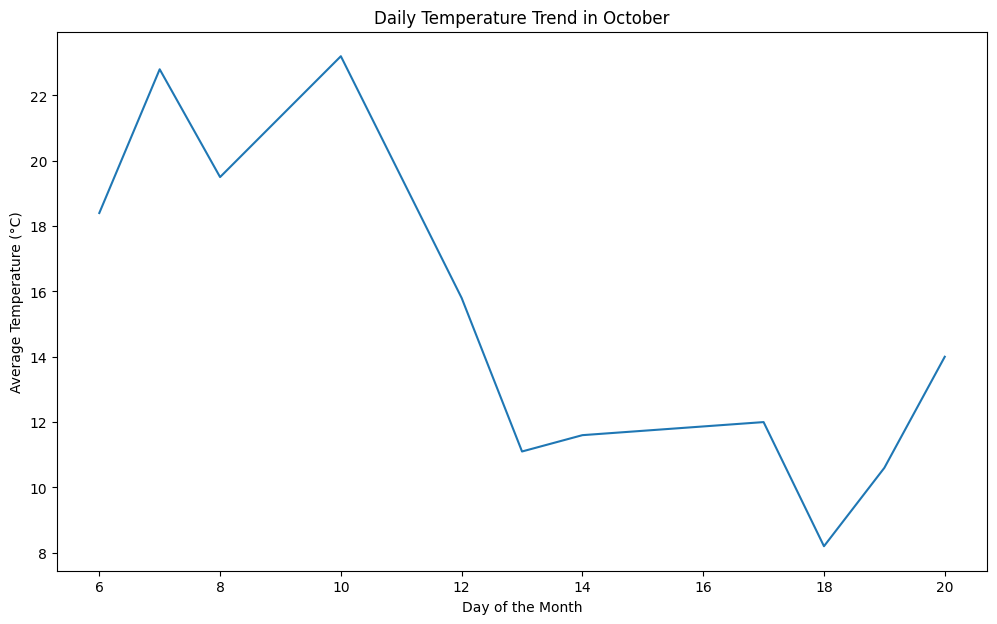

In [76]:
# Trend of temperature over the month
full_data['Day'] = full_data['Date'].dt.day  # Extract day for plotting
plt.figure(figsize=(12, 7))
sns.lineplot(data=full_data, x='Day', y='temp', ci=None)
plt.title('Daily Temperature Trend in October')
plt.xlabel('Day of the Month')
plt.ylabel('Average Temperature (°C)')
plt.show()


In [77]:
# Specify the columns of interest
columns_of_interest = [
    "X", "Y", "Unique Squirrel ID", "Hectare", "Shift", "Date", 
    "Hectare Squirrel Number", "Age", "Primary Fur Color", "Highlight Fur Color", 
    "Combination of Primary and Highlight Color", "Color notes", "Location", 
    "Above Ground Sighter Measurement", "Specific Location", "Running", "Chasing", 
    "Climbing", "Eating", "Foraging", "Other Activities", "Kuks", "Quaas", "Moans", 
    "Tail flags", "Tail twitches", "Approaches", "Indifferent", "Runs from", 
    "Other Interactions", "Lat/Long", "Diseased", "Note Squirrel & Park Stories", 
    "Story Topic: Squirrel Experience or Squirrel Story", "Story Topic: Park Experience or Census Taker Story", 
    "Story Topic: Dogs", "Story Topic: Other Animals", "Story Topic: Accidental Poems", 
    "Story Topic: Squirrels Acting Odd", "Story Topic: Census Takers Recognized", "Story Topic: Other", 
    "name", "temp", "dew", "humidity", "precip", "precipcover", "preciptype", 
    "snow", "snowdepth", "windgust", "windspeed", "winddir", "solarradiation", 
    "solarenergy", "sunrise", "sunset"
]


# Check for missing values in specified columns
missing_values_specific = full_data[columns_of_interest].isnull().sum()
print(missing_values_specific)


X                                                        0
Y                                                        0
Unique Squirrel ID                                       0
Hectare                                                  0
Shift                                                    0
Date                                                     0
Hectare Squirrel Number                                  0
Age                                                    121
Primary Fur Color                                       55
Highlight Fur Color                                   1089
Combination of Primary and Highlight Color               0
Color notes                                           2850
Location                                                64
Above Ground Sighter Measurement                       114
Specific Location                                     2551
Running                                                  0
Chasing                                                 

In [13]:
import pandas as pd

# Load your data

# Define keywords for ground and above ground statuses
ground_keywords = ['Ground', 'bush', 'stump', 'roots', 'under', 'bottom', 'rock', 'bench', 'plane', 
                   'grass', 'trash', 'behind', 'near', 'lawn']
above_ground_keywords = ['Above Ground', 'Branch', 'tree', 'Climbing']

# Function to categorize ground status based on keywords
def categorize_ground_status(location, specific_location):
    if pd.notna(location) and 'Ground' in location:
        return 'Ground'
    if pd.notna(location) and 'Above Ground' in location:
        return 'Above Ground'
    if pd.notna(specific_location):
        for keyword in ground_keywords:
            if keyword in specific_location.lower():
                return 'Ground'
        for keyword in above_ground_keywords:
            if keyword in specific_location.lower():
                return 'Above Ground'
    return 'Unknown'

# Apply the function to create the 'Ground_Status' column
combined_data['Ground_Status'] = combined_data.apply(lambda row: categorize_ground_status(row['Location'], row['Specific Location']), axis=1)


# Calculate the percentage of diseased squirrels for each ground status
ground_disease_stats = combined_data.groupby('Ground_Status')['Diseased'].mean() * 100

# Display the results
ground_disease_stats


Ground_Status
Ground     10.680593
Unknown     9.375000
Name: Diseased, dtype: float64

In [16]:

# Define keywords for ground and above ground statuses
ground_keywords = ['Ground', 'bush', 'stump', 'roots', 'under', 'bottom', 'rock', 'bench', 'plane', 
                   'grass', 'trash', 'behind', 'near', 'lawn']
above_ground_keywords = ['Above Ground', 'Branch', 'tree', 'Climbing']

# Function to categorize ground status based on keywords
def categorize_ground_status(location, specific_location):
    if pd.notna(location) and 'Ground' in location:
        return 'Ground'
    if pd.notna(location) and 'Above Ground' in location:
        return 'Above Ground'
    if pd.notna(specific_location):
        for keyword in ground_keywords:
            if keyword in specific_location.lower():
                return 'Ground'
        for keyword in above_ground_keywords:
            if keyword in specific_location.lower():
                return 'Above Ground'
    return 'Unknown'

# Apply the function to create the 'Ground_Status' column
combined_data['Ground_Status'] = combined_data.apply(lambda row: categorize_ground_status(row['Location'], row['Specific Location']), axis=1)

# Filter for squirrels with known ground status (either "Ground" or "Above Ground")
known_ground_squirrels = combined_data[combined_data['Ground_Status'].isin(['Ground', 'Above Ground'])]

# Calculate the proportion of squirrels engaged in each activity by ground status
activity_columns = ['Eating', 'Chasing', 'Running', 'Climbing']
activity_stats = known_ground_squirrels.groupby('Ground_Status')[activity_columns].mean() * 100

# Display the results
print(activity_stats)

                  Eating   Chasing    Running   Climbing
Ground_Status                                           
Ground         25.303235  9.265499  24.393531  22.203504


In [17]:

# Define keywords for ground and above ground statuses
ground_keywords = ['Ground', 'bush', 'stump', 'roots', 'under', 'bottom', 'rock', 'bench', 'plane', 
                   'grass', 'trash', 'behind', 'near', 'lawn']
above_ground_keywords = ['Above Ground', 'Branch', 'tree', 'Climbing']

# Function to categorize ground status based on keywords
def categorize_ground_status(location, specific_location):
    if pd.notna(location) and 'Ground' in location:
        return 'Ground'
    if pd.notna(location) and 'Above Ground' in location:
        return 'Above Ground'
    if pd.notna(specific_location):
        for keyword in ground_keywords:
            if keyword in specific_location.lower():
                return 'Ground'
        for keyword in above_ground_keywords:
            if keyword in specific_location.lower():
                return 'Above Ground'
    return 'Unknown'

# Apply the function to create the 'Ground_Status' column
combined_data['Ground_Status'] = combined_data.apply(lambda row: categorize_ground_status(row['Location'], row['Specific Location']), axis=1)

# Filter for squirrels that are on the ground and are diseased
diseased_ground_squirrels = combined_data[(combined_data['Ground_Status'] == 'Ground') & (combined_data['Diseased'] == 1)]

# Display the filtered rows
print(diseased_ground_squirrels)

              X          Y Unique Squirrel ID Hectare Shift        Date  \
21   -73.967063  40.773499     12I-AM-1013-01     12I    AM  2018-10-13   
37   -73.957956  40.795934     38C-PM-1014-09     38C    PM  2018-10-14   
53   -73.970408  40.769028      6I-PM-1013-06     06I    PM  2018-10-13   
62   -73.968381  40.778014     16E-PM-1018-06     16E    PM  2018-10-18   
78   -73.961709  40.794459     35A-PM-1013-06     35A    PM  2018-10-13   
...         ...        ...                ...     ...   ...         ...   
2984 -73.972408  40.774416     11D-AM-1010-08     11D    AM  2018-10-10   
2994 -73.975653  40.773354      8B-PM-1012-07     08B    PM  2018-10-12   
3019 -73.967883  40.784761     23B-PM-1012-06     23B    PM  2018-10-12   
3026 -73.964544  40.781160     21F-PM-1018-02     21F    PM  2018-10-18   
3031 -73.975479  40.769640      5E-PM-1012-01     05E    PM  2018-10-12   

      Hectare Squirrel Number       Age Primary Fur Color Highlight Fur Color  \
21                

In [15]:
import pandas as pd

# Load your data

# Define keywords for ground and above ground statuses
ground_keywords = ['Ground', 'bush', 'stump', 'roots', 'under', 'bottom', 'rock', 'bench', 'plane', 
                   'grass', 'trash', 'behind', 'near', 'lawn']
above_ground_keywords = ['Above Ground', 'Branch', 'tree', 'Climbing']

# Function to categorize ground status based on keywords
def categorize_ground_status(location, specific_location):
    if pd.notna(location) and 'Ground' in location:
        return 'Ground'
    if pd.notna(location) and 'Above Ground' in location:
        return 'Above Ground'
    if pd.notna(specific_location):
        for keyword in ground_keywords:
            if keyword in specific_location.lower():
                return 'Ground'
        for keyword in above_ground_keywords:
            if keyword in specific_location.lower():
                return 'Above Ground'
    return 'Unknown'

# Apply the function to create the 'Ground_Status' column
combined_data['Ground_Status'] = combined_data.apply(lambda row: categorize_ground_status(row['Location'], row['Specific Location']), axis=1)


# Calculate the percentage of diseased squirrels for each ground status
ground_disease_stats = combined_data.groupby('Ground_Status')['Diseased'].mean() * 100

# Display the results
ground_disease_stats


# Filter for squirrels with 'Unknown' ground status
unknown_ground_squirrels = combined_data[combined_data['Ground_Status'] == 'Unknown']

# Display the rows for squirrels with 'Unknown' ground status
unknown_ground_squirrels

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,has_climbing,has_bottom,has_up,has_walking,has_high,has_lawn,has_ran,has_run,has_running,Ground_Status
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,2018-10-14,3,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,Unknown
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,2018-10-19,4,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,Unknown
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,2018-10-17,14,Adult,Gray,NaN,...,0,0,0,0,0,0,0,0,0,Unknown
5,-73.968361,40.772591,11H-AM-1010-03,11H,AM,2018-10-10,3,Adult,Cinnamon,White,...,0,0,0,0,0,0,0,0,0,Unknown
59,-73.959500,40.790337,32E-PM-1017-13,32E,PM,2018-10-17,13,Adult,Gray,NaN,...,0,0,0,0,0,0,0,0,0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,-73.974403,40.777730,13A-AM-1017-04,13A,AM,2018-10-17,4,Adult,Gray,NaN,...,0,0,0,0,0,0,0,0,0,Unknown
2876,-73.963082,40.791484,31B-PM-1007-04,31B,PM,2018-10-07,4,Juvenile,Gray,NaN,...,0,0,0,0,0,0,0,0,0,Unknown
2882,-73.954662,40.790975,34I-PM-1010-05,34I,PM,2018-10-10,5,Adult,Gray,NaN,...,0,0,0,0,0,0,0,0,0,Unknown
2917,-73.950606,40.797619,42H-PM-1014-03,42H,PM,2018-10-14,3,Adult,NaN,NaN,...,0,0,0,0,0,0,0,0,0,Unknown


Correlations with Diseased Status:
 temp             -0.054700
dew              -0.044512
humidity         -0.027152
solarenergy      -0.008133
solarradiation   -0.008113
winddir           0.019784
windspeed         0.063896
windgust          0.064535
precip            0.077752
precipcover       0.088914
Diseased          1.000000
snow                   NaN
snowdepth              NaN
Name: Diseased, dtype: float64


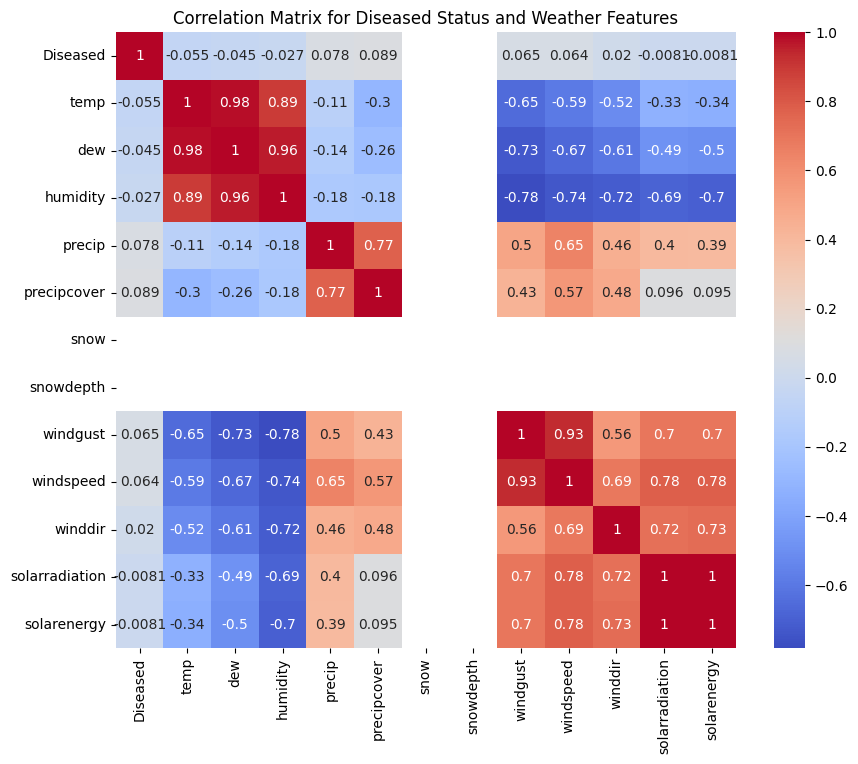

In [78]:

# Assuming 'combined_data' is your DataFrame containing all the data including weather and squirrel observations
# Ensure 'Diseased' is an integer type for correlation calculation
final_combined_data['Diseased'] = final_combined_data['Diseased'].astype(int)

# List of weather-related features'
weather_features = [
    "temp", "dew", "humidity", "precip", "precipcover", 
    "snow", "snowdepth", "windgust", "windspeed", "winddir", 
    "solarradiation", "solarenergy"
]

# Calculate correlation matrix for 'Diseased' and the selected weather features
correlation_matrix = final_combined_data[['Diseased'] + weather_features].corr()

# Extracting the 'Diseased' correlations
diseased_correlations = correlation_matrix['Diseased'].sort_values()

# Print correlations with 'Diseased'
print("Correlations with Diseased Status:\n", diseased_correlations)

# Optionally, visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Diseased Status and Weather Features')
plt.show()


In [23]:
# Columns of interest
columns_of_interest = ['Color notes', 'Specific Location', 'Other Activities']

# Convert categorical columns to dummy variables for correlation analysis
squirrel_data_encoded = pd.get_dummies(combined_data[columns_of_interest], prefix=columns_of_interest, dummy_na=True)

# Add the 'Diseased' column to the encoded dataframe for correlation analysis
squirrel_data_encoded['Diseased'] = combined_data['Diseased'].astype(float)

# Calculate correlations with the 'Diseased' column
disease_correlations = squirrel_data_encoded.corr()['Diseased'].drop('Diseased').sort_values(ascending=False)

# Filter for correlations above a threshold (e.g., 0.05 for a weak positive or negative correlation)
disease_correlations_filtered = disease_correlations[disease_correlations.abs() > 0.05]

# Display the filtered correlations
print(disease_correlations_filtered)

Specific Location_bench                              0.074404
Other Activities_digging                             0.067409
Other Activities_watching                            0.057138
Specific Location_on a rock                          0.057138
Other Activities_eating upside down on tree trunk    0.052603
                                                       ...   
Other Activities_prancing                            0.052603
Specific Location_in tree by arsenal  climbing       0.052603
Other Activities_playing with #5                     0.052603
Specific Location_on tree roots                      0.052603
Specific Location_behind fence tree                  0.052603
Name: Diseased, Length: 98, dtype: float64


In [19]:
# Select relevant columns for analysis
activity_columns = ['Diseased', 'Running', 'Eating', 'Chasing', 'Climbing', 'Foraging']

# Convert the activity columns to numeric (assuming True/False format, where True = 1, False = 0)
combined_data[activity_columns] = combined_data[activity_columns].astype(int)

# Calculate the percentage of inactive (False, represented as 0) activities for diseased squirrels
diseased_squirrels = combined_data[combined_data['Diseased'] == 1]
inactive_percentage_diseased = (1 - diseased_squirrels[activity_columns[1:]].mean()) * 100

# Calculate the percentage of inactive (False) activities for non-diseased squirrels
non_diseased_squirrels = combined_data[combined_data['Diseased'] == 0]
inactive_percentage_non_diseased = (1 - non_diseased_squirrels[activity_columns[1:]].mean()) * 100

# Display the results
print("Percentage of Inactive Activities (False) among Diseased Squirrels:")
print(inactive_percentage_diseased)

print("\nPercentage of Inactive Activities (False) among Non-Diseased Squirrels:")
print(inactive_percentage_non_diseased)

Percentage of Inactive Activities (False) among Diseased Squirrels:
Running     84.210526
Eating      71.826625
Chasing     91.950464
Climbing    85.448916
Foraging    46.749226
dtype: float64

Percentage of Inactive Activities (False) among Non-Diseased Squirrels:
Running     74.898487
Eating      75.193798
Chasing     90.660760
Climbing    77.334810
Foraging    53.303802
dtype: float64


In [20]:

# Filter for non-diseased squirrels
non_diseased_squirrels = combined_data[combined_data['Diseased'] == 0]

# Display the non-diseased squirrels
print(non_diseased_squirrels)

              X          Y Unique Squirrel ID Hectare Shift        Date  \
0    -73.956134  40.794082     37F-PM-1014-03     37F    PM  2018-10-14   
1    -73.968857  40.783783     21B-AM-1019-04     21B    AM  2018-10-19   
2    -73.974281  40.775534     11B-PM-1014-08     11B    PM  2018-10-14   
3    -73.959641  40.790313     32E-PM-1017-14     32E    PM  2018-10-17   
4    -73.970268  40.776213     13E-AM-1017-05     13E    AM  2018-10-17   
...         ...        ...                ...     ...   ...         ...   
3025 -73.966290  40.784330     23C-AM-1019-01     23C    AM  2018-10-19   
3027 -73.963943  40.790868     30B-AM-1007-04     30B    AM  2018-10-07   
3028 -73.970402  40.782560     19A-PM-1013-05     19A    PM  2018-10-13   
3029 -73.966587  40.783678     22D-PM-1012-07     22D    PM  2018-10-12   
3030 -73.963994  40.789915     29B-PM-1010-02     29B    PM  2018-10-10   

      Hectare Squirrel Number    Age Primary Fur Color  \
0                           3    NaN     

### Correlation Findings for Weather Variables and Disease Status in Squirrels

- **Wind Direction (`winddir`)**: 
  - **Correlation Coefficient**: 0.019784
  - **Interpretation**: Exhibits a weak positive correlation, suggesting a very slight increase in disease likelihood with changes in wind direction, though the effect is minimal.

- **Wind Speed and Gust (`windspeed`, `windgust`)**:
  - **Correlation Coefficients**: 
    - **Wind Speed**: 0.063896
    - **Wind Gust**: 0.064535
  - **Interpretation**: Both features show weak positive correlations, hinting that higher wind speeds and gusts might slightly increase the likelihood of disease among squirrels.

- **Precipitation (`precip`) and Precipitation Cover (`precipcover`)**:
  - **Correlation Coefficients**: 
    - **Precipitation**: 0.077752
    - **Precipitation Cover**: 0.088914
  - **Interpretation**: These features show the strongest correlations among the weather variables, suggesting a slightly higher likelihood of disease as precipitation and its coverage increase. This may indicate that wet conditions could potentially facilitate the spread or severity of diseases among squirrels.

- **Diseased Squirrels on the Ground**:
  - **Correlation Coefficients**: 
    - **Ground_Status**: 0.1068
 - **Interpretation**: This shows that 10.68% of squirrels of diseased are on the ground. This could be a sign of inactivity in diseased squirrels which would logically make sense as well.







# Prepare the Data

1. Data cleaning
- Remove or fill missing values.
- Fix or remove outliers.
- Convert types.

 2. Feature selection (optional)
- Drop the attributes that provide no useful information for the task.

3. Feature engineering
- Discretize continuous features.
- Decompose features (e.g., categorical, date/time).
- Add promising transformations of features (e.g., log(x), sqrt(x), x^2, ...).

4. Feature scaling
- Standardize or normalize features.


In [189]:
# Cleaned dataset
cleaned_dataset = final_combined_data.copy()

# Safely handle missing values without using inplace=True
cleaned_dataset['Age'] = cleaned_dataset['Age'].fillna(cleaned_dataset['Age'].mode()[0])
cleaned_dataset['Primary Fur Color'] = cleaned_dataset['Primary Fur Color'].fillna(cleaned_dataset['Primary Fur Color'].mode()[0])
cleaned_dataset['Highlight Fur Color'] = cleaned_dataset['Highlight Fur Color'].fillna('Unknown')

# Check if 'Color Notes' exists in DataFrame before filling missing values
if 'Color Notes' in cleaned_dataset.columns:
    cleaned_dataset['Color Notes'] = cleaned_dataset['Color Notes'].fillna('No notes')

cleaned_dataset['Location'] = cleaned_dataset['Location'].fillna('Unknown')
cleaned_dataset['Above Ground Sighter Measurement'] = cleaned_dataset['Above Ground Sighter Measurement'].fillna('Unknown')
cleaned_dataset['Specific Location'] = cleaned_dataset['Specific Location'].fillna('Not specified')

# Save the cleaned data
cleaned_dataset.to_csv('cleaned_dataset.csv', index=False)
print("Cleaned dataset saved.")


Cleaned dataset saved.


In [84]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

# Load your dataset
file_path = 'finalCombinedData.csv'  # Replace with your dataset path
finalData = pd.read_csv(file_path)

# Define a custom transformer for creating the Ground_Status column
class GroundStatusTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.ground_keywords = ['Ground', 'bush', 'stump', 'roots', 'under', 'bottom', 'rock', 
                                'bench', 'plane', 'grass', 'trash', 'behind', 'near', 'lawn']
        self.above_keywords = ['Above Ground', 'Branch', 'tree', 'Climbing']

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Create a Ground_Status column based on existing columns
        X = X.copy()
        X['Ground_Status'] = X.apply(lambda row: self._categorize_ground_status(row['Location'], row['Specific Location']), axis=1)
        return X[['Ground_Status']]

    def _categorize_ground_status(self, location, specific_location):
        if pd.notna(location) and 'Ground' in location:
            return 'Ground'
        if pd.notna(location) and 'Above Ground' in location:
            return 'Above Ground'
        if pd.notna(specific_location):
            for keyword in self.ground_keywords:
                if keyword in specific_location.lower():
                    return 'Ground'
            for keyword in self.above_keywords:
                if keyword in specific_location.lower():
                    return 'Above Ground'
        return 'Unknown'

# Custom transformer for MultiLabelBinarizer
class MultiLabelBinarizerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mlb = MultiLabelBinarizer()

    def fit(self, X, y=None):
        # Combine Primary Fur Color and Highlight Fur Color, split both by commas
        combined = X.apply(
            lambda row: str(row['Primary Fur Color']).split(',') + 
                        str(row['Highlight Fur Color']).split(','),
            axis=1
        )
        self.mlb.fit(combined)
        return self

    def transform(self, X):
        # Combine Primary Fur Color and Highlight Fur Color, split both by commas
        combined = X.apply(
            lambda row: str(row['Primary Fur Color']).split(',') + 
                        str(row['Highlight Fur Color']).split(','),
            axis=1
        )
        transformed = self.mlb.transform(combined)
        return pd.DataFrame(transformed, columns=self.mlb.classes_)


from sklearn.base import BaseEstimator, TransformerMixin

class DropColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.columns_to_drop)

In [98]:
# Copy the data
train, test = split_data(finalData)

# Reset indices while maintaining the random sample
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

datatrain = train.copy()

In [99]:

dropped_features = ['X', 'Y', "Hectare", "Above Ground Sighter Measurement", "Other Interactions", "preciptype",
                "Note Squirrel & Park Stories", "Story Topic: Squirrel Experience or Squirrel Story",
                "Story Topic: Park Experience or Census Taker Story", "Story Topic: Dogs",
                "Story Topic: Other Animals", "Story Topic: Accidental Poems", "Story Topic: Squirrels Acting Odd",
                "Story Topic: Census Takers Recognized", "Story Topic: Other", "name", "Unique Squirrel ID",
                "Color notes", "Combination of Primary and Highlight Color", "solarradiation", "winddir",
                "windspeed", "windgust", "snowdepth", "snow", "solarenergy", "sunrise", "sunset",
                "humidity", "dew"]

categorical_features = ['Age', 'Location', 'Primary Fur Color']

numerical_features = ['precip', 'precipcover', 'temp', 'Hectare Squirrel Number']

text_features = ['Highlight Fur Color', 'Other Activities','Primary Fur Color', "Specific Location"]

bool_features = ["Running", "Chasing", "Climbing", "Approaches", "Eating",
                 "Foraging", "Kuks", "Quaas", "Indifferent", "Moans",
                 "Tail flags", "Tail twitches", "Runs from"]

# Define Transformation Pipelines
numerical_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

text_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('fur_color', MultiLabelBinarizerTransformer())
])

bool_trans = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='if_binary', sparse_output=False))
])

# Define Preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('drop', 'drop', dropped_features),                     # Drop unnecessary features
    ('categorical', categorical_trans, categorical_features),  # Process categorical features
    ('numerical', numerical_trans, numerical_features),        # Process numerical features
    ('text', text_trans, text_features),                       # Process text features
    ('bool', bool_trans, bool_features)                        # Process boolean features
], remainder='passthrough')  # Keep remaining columns as-is


# Fit the pipeline
preprocessor.fit_transform(datatrain)

# View pipeline steps
preprocessor

/Users/jyounes/Library/Python/3.9/lib/python/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('drop', 'drop',
                                 ['X', 'Y', 'Hectare',
                                  'Above Ground Sighter Measurement',
                                  'Other Interactions', 'preciptype',
                                  'Note Squirrel & Park Stories',
                                  'Story Topic: Squirrel Experience or '
                                  'Squirrel Story',
                                  'Story Topic: Park Experience or Census '
                                  'Taker Story',
                                  'Story Topic: Dogs',
                                  'Story Topic: Other Animals',
                                  'Story Topic: Accidental Poems...
                                                 ('fur_color',
                                                  MultiLabelBinarizerTransformer())]),
                                 ['Highlight Fur Color', 'Other Activities',
                                  'Primary Fur Color', 'Specific Location']),
                                ('bool',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False))]),
                                 ['Running', 'Chasing', 'Climbing',
                                  'Approaches', 'Eating', 'Foraging', 'Kuks',
                                  'Quaas', 'Indifferent', 'Moans', 'Tail flags',
                                  'Tail twitches', 'Runs from'])])

In [68]:
# Get the transformed data
transformed_data = preprocessor.transform(X)

# Convert to DataFrame for easier inspection (if sparse_output=False in all OneHotEncoders)
transformed_df = pd.DataFrame(transformed_data)

print("Transformed Data:")
print(transformed_df.head())

Transformed Data:
   categorical__Age_?  categorical__Age_Adult  categorical__Age_Juvenile  \
0                 0.0                     1.0                        0.0   
1                 0.0                     1.0                        0.0   
2                 0.0                     1.0                        0.0   
3                 0.0                     1.0                        0.0   
4                 0.0                     1.0                        0.0   

   categorical__Location_Above Ground  categorical__Location_Ground Plane  \
0                                 0.0                                 1.0   
1                                 0.0                                 1.0   
2                                 1.0                                 0.0   
3                                 0.0                                 1.0   
4                                 1.0                                 0.0   

   categorical__Primary Fur Color_Black  \
0                  

In [69]:
print("Original Columns:")
print(X.columns)


print("Transformed Columns:")
print(transformed_df.columns)

Original Columns:
Index(['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Shift', 'Date',
       'Hectare Squirrel Number', 'Age', 'Primary Fur Color',
       'Highlight Fur Color', 'Combination of Primary and Highlight Color',
       'Color notes', 'Location', 'Above Ground Sighter Measurement',
       'Specific Location', 'Running', 'Chasing', 'Climbing', 'Eating',
       'Foraging', 'Other Activities', 'Kuks', 'Quaas', 'Moans', 'Tail flags',
       'Tail twitches', 'Approaches', 'Indifferent', 'Runs from',
       'Other Interactions', 'Lat/Long', 'Note Squirrel & Park Stories',
       'Story Topic: Squirrel Experience or Squirrel Story',
       'Story Topic: Park Experience or Census Taker Story',
       'Story Topic: Dogs', 'Story Topic: Other Animals',
       'Story Topic: Accidental Poems', 'Story Topic: Squirrels Acting Odd',
       'Story Topic: Census Takers Recognized', 'Story Topic: Other', 'name',
       'temp', 'dew', 'humidity', 'precip', 'precipcover', 'preciptype',
       's

In [70]:
preprocessor['categorical']['encoder'].categories_

[array(['?', 'Adult', 'Juvenile'], dtype=object),
 array(['Above Ground', 'Ground Plane'], dtype=object),
 array(['Black', 'Cinnamon', 'Gray'], dtype=object)]

In [71]:
# Look at the statistics for the imputer
preprocessor['numerical']['imputer'].statistics_

array([ 1.24672658,  5.61782652, 15.9228562 ,  4.11972296])

## Short-List Promising Models

1. **Train many quick and dirty models from different categories** (e.g., linear, naive Bayes, SVM, Random Forests, neural net, ...) using standard parameters.

2. **Measure and compare their performance.** For each model, use N-fold cross-validation and compute the mean and standard deviation of the performance measure on the N folds.

3. **Analyze the most significant variables for each algorithm.**
4. **Analyze the types of errors the models make.** What data would a human have used to avoid these errors?

5. **Have a quick round of feature selection and engineering.**

6. **Have one or two more quick iterations of the five previous steps.**

7. **Short-list the top three to five most promising models,** preferring models that make different types of errors.


### Automate what you can.
- If the data is huge you may want to sample smaller training sets so you can train many different models faster (this may penalize more complex models though).


## Fine-Tune the System

1. **Fine-tune the hyperparameters using cross-validation.** Treat your data transformation choices as hyperparameters, especially when you are not sure about them. Unless there are very few hyperparameter values to explore, prefer random search over grid search. If training is very long, you may prefer a Bayesian optimization approach.

2. **Try Ensemble methods.** Combining your best models will often perform better than running them individually.

3. **Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.**


## Present Your Solution

1. **Document what you have done.**
2. **Create a nice presentation, highlighting the big picture first.**

3. **Explain why your solution achieves the business objective.**

4. **Don't forget to present interesting points you noticed along the way:** Describe what worked and what did not; List your assumptions and your system's limitations.

5. **Ensure your key findings are communicated through beautiful visualizations or easy-to-remember statements** (e.g., "the median income is the number-one predictor of housing prices").
